In [ ]:
Data Collection


In [28]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the Nifty 50 Index
ticker_symbol = "^NSEI"  # This is the ticker symbol for Nifty 50 on Yahoo Finance

# Define the time period
start_date = "2014-01-01"
end_date = "2024-01-01"

# Fetch historical data
nifty_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Reset the index to make 'Date' a column
nifty_data.reset_index(inplace=True)

# Display the first few rows of the data
print(nifty_data.head())

# Save the data to a CSV file
nifty_data.to_csv("nifty_50_data.csv", index=False)

[*********************100%***********************]  1 of 1 completed

Price        Date        Close         High          Low         Open  Volume
Ticker                   ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
0      2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
1      2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
2      2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
3      2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
4      2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900


In [ ]:
 Data Preprocessing
 

In [9]:
import pandas as pd

# Load the data from the CSV file
file_path = 'nifty_50_data.csv'  # Specify the path
nifty_data = pd.read_csv(file_path)

# Display initial information about the dataset
nifty_data_info = nifty_data.info()
nifty_data_head = nifty_data.head()

nifty_data_info, nifty_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2453 non-null   object 
 1   Close   2453 non-null   float64
 2   High    2453 non-null   float64
 3   Low     2453 non-null   float64
 4   Open    2453 non-null   float64
 5   Volume  2453 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 115.1+ KB


(None,
          Date        Close         High          Low         Open  Volume
 0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100
 1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000
 2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300
 3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600
 4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900)

In [11]:
# Check for duplicates in the dataset
duplicate_rows = nifty_data[nifty_data.duplicated()]

# Remove duplicates if any
nifty_data_cleaned = nifty_data.drop_duplicates()

# Display the number of duplicate rows and the cleaned DataFrame
num_duplicates = duplicate_rows.shape[0]
cleaned_data_info = nifty_data_cleaned.info()

num_duplicates, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2453 non-null   object 
 1   Close   2453 non-null   float64
 2   High    2453 non-null   float64
 3   Low     2453 non-null   float64
 4   Open    2453 non-null   float64
 5   Volume  2453 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 115.1+ KB


(0, None)

In [13]:
# Recreate the DataFrame since the context was lost
import pandas as pd

# Assuming the CSV is loaded again
# Load the data from the CSV file
file_path = 'nifty_50_data.csv'  # Specify the path
nifty_data = pd.read_csv(file_path)

# Check for duplicates in the dataset
duplicate_rows = nifty_data[nifty_data.duplicated()]

# Remove duplicates if any
nifty_data_cleaned = nifty_data.drop_duplicates()

# Display the number of duplicate rows and the cleaned DataFrame info
num_duplicates = duplicate_rows.shape[0]
cleaned_data_info = nifty_data_cleaned.info()

num_duplicates, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2453 non-null   object 
 1   Close   2453 non-null   float64
 2   High    2453 non-null   float64
 3   Low     2453 non-null   float64
 4   Open    2453 non-null   float64
 5   Volume  2453 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 115.1+ KB


(0, None)

In [15]:
import pandas as pd

# Load the data
nifty_data = pd.read_csv('nifty_50_data.csv')

In [17]:
# Check for duplicates and remove them
duplicate_rows = nifty_data[nifty_data.duplicated()]
nifty_data_cleaned = nifty_data.drop_duplicates()
print(f"Number of duplicates found: {duplicate_rows.shape[0]}")

Number of duplicates found: 0


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Select columns to normalize
columns_to_normalize = ['Close', 'High', 'Low', 'Open', 'Volume']

# Min-Max Scaling
nifty_data_minmax_scaled = min_max_scaler.fit_transform(nifty_data_cleaned[columns_to_normalize])

# Standard Scaler
nifty_data_standard_scaled = standard_scaler.fit_transform(nifty_data_cleaned[columns_to_normalize])

print("Min-Max Scaled Data:\n", nifty_data_minmax_scaled)
print("Standard Scaled Data:\n", nifty_data_standard_scaled)

Min-Max Scaled Data:
 [[0.01395949 0.02157296 0.01765674 0.02239701 0.08729983]
 [0.01332569 0.01291846 0.01511303 0.01563958 0.07675318]
 [0.01207711 0.01310853 0.01504952 0.0173052  0.06532303]
 ...
 [0.99214407 0.99203611 0.9884279  0.98480056 0.14163446]
 [1.         1.         1.         0.99856553 0.2170624 ]
 [0.99700219 0.99802654 0.99993016 1.         0.14958586]]
Standard Scaled Data:
 [[-1.43272669 -1.40925764 -1.42482116 -1.41441047 -0.74960898]
 [-1.43524747 -1.44357078 -1.43496361 -1.44130185 -0.84575491]
 [-1.44021332 -1.4428172  -1.43521685 -1.43467345 -0.94995494]
 ...
 [ 2.45773632  2.43840979  2.44591612  2.41550042 -0.25428128]
 [ 2.48898112  2.46998481  2.49205733  2.4702785   0.43333827]
 [ 2.47705816  2.46216047  2.49177886  2.47598702 -0.1817943 ]]


In [21]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

# Example: Creating sequences of length 5
sequence_length = 5
sequences = create_sequences(nifty_data_cleaned['Close'].values, sequence_length)
print("Created Time-Series Sequences:\n", sequences)

Created Time-Series Sequences:
 [[ 6221.14990234  6211.14990234  6191.45019531  6162.25
   6174.60009766]
 [ 6211.14990234  6191.45019531  6162.25        6174.60009766
   6168.35009766]
 [ 6191.45019531  6162.25        6174.60009766  6168.35009766
   6171.45019531]
 ...
 [21150.15039062 21255.05078125 21349.40039062 21441.34960938
  21654.75      ]
 [21255.05078125 21349.40039062 21441.34960938 21654.75
  21778.69921875]
 [21349.40039062 21441.34960938 21654.75       21778.69921875
  21731.40039062]]


In [ ]:
                                              Feature Engineering 
                                             (TECHNICAL INDICATOR 
            Technical Indicators:
	•	Trend Indicators:
	•	Moving Averages (SMA, EMA).
	•	MACD (signal, line, histogram).
	•	Momentum Indicators:
	•	RSI, Stochastic Oscillator.
	•	Volatility Indicators:
	•	Bollinger Bands, ATR.
	•	Volume Indicators:
	•	OBV, Chaikin Oscillator.
	•	Custom Features:
	•	Lagged values of prices.
	•	Moving average crossover signals.
	•	Average price ratios (High-Low, Open-Close).
	•	Market sentiment scores from external APIs.)

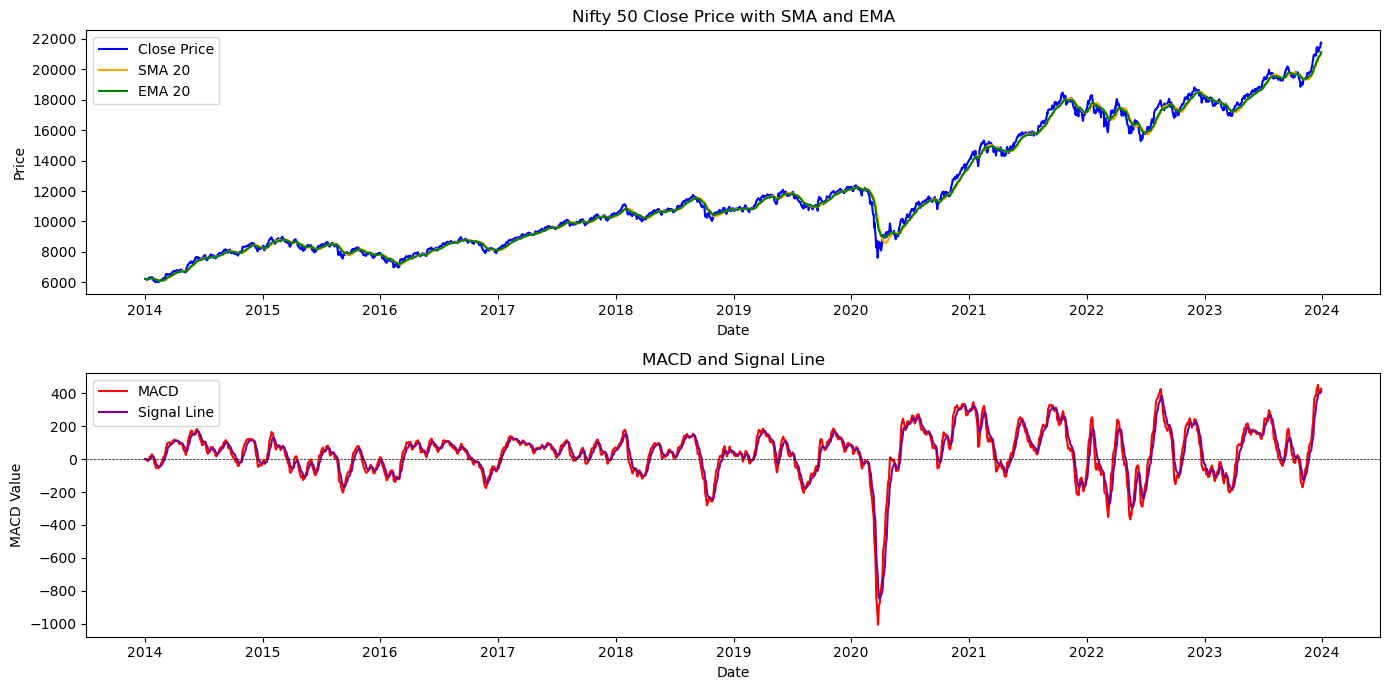

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the actual CSV file
file_path = 'nifty_50_data.csv'  # Update this path as necessary
nifty_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Calculate Simple Moving Average (SMA)
nifty_data['SMA_20'] = nifty_data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
nifty_data['EMA_20'] = nifty_data['Close'].ewm(span=20, adjust=False).mean()

# Calculate Moving Average Convergence Divergence (MACD)
nifty_data['EMA_12'] = nifty_data['Close'].ewm(span=12, adjust=False).mean()
nifty_data['EMA_26'] = nifty_data['Close'].ewm(span=26, adjust=False).mean()
nifty_data['MACD'] = nifty_data['EMA_12'] - nifty_data['EMA_26']
nifty_data['Signal_Line'] = nifty_data['MACD'].ewm(span=9, adjust=False).mean()

# Save the updated DataFrame with indicators
nifty_data.to_csv('nifty_50_data_with_indicators.csv')

# Visualizations
plt.figure(figsize=(14, 7))

# Plotting Close price and SMA
plt.subplot(2, 1, 1)
plt.plot(nifty_data['Close'], label='Close Price', color='blue')
plt.plot(nifty_data['SMA_20'], label='SMA 20', color='orange')
plt.plot(nifty_data['EMA_20'], label='EMA 20', color='green')
plt.title('Nifty 50 Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plotting MACD
plt.subplot(2, 1, 2)
plt.plot(nifty_data['MACD'], label='MACD', color='red')
plt.plot(nifty_data['Signal_Line'], label='Signal Line', color='purple')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Save the updated DataFrame with indicators
nifty_data.to_csv('nifty_50_data_with_trendindicators.csv')

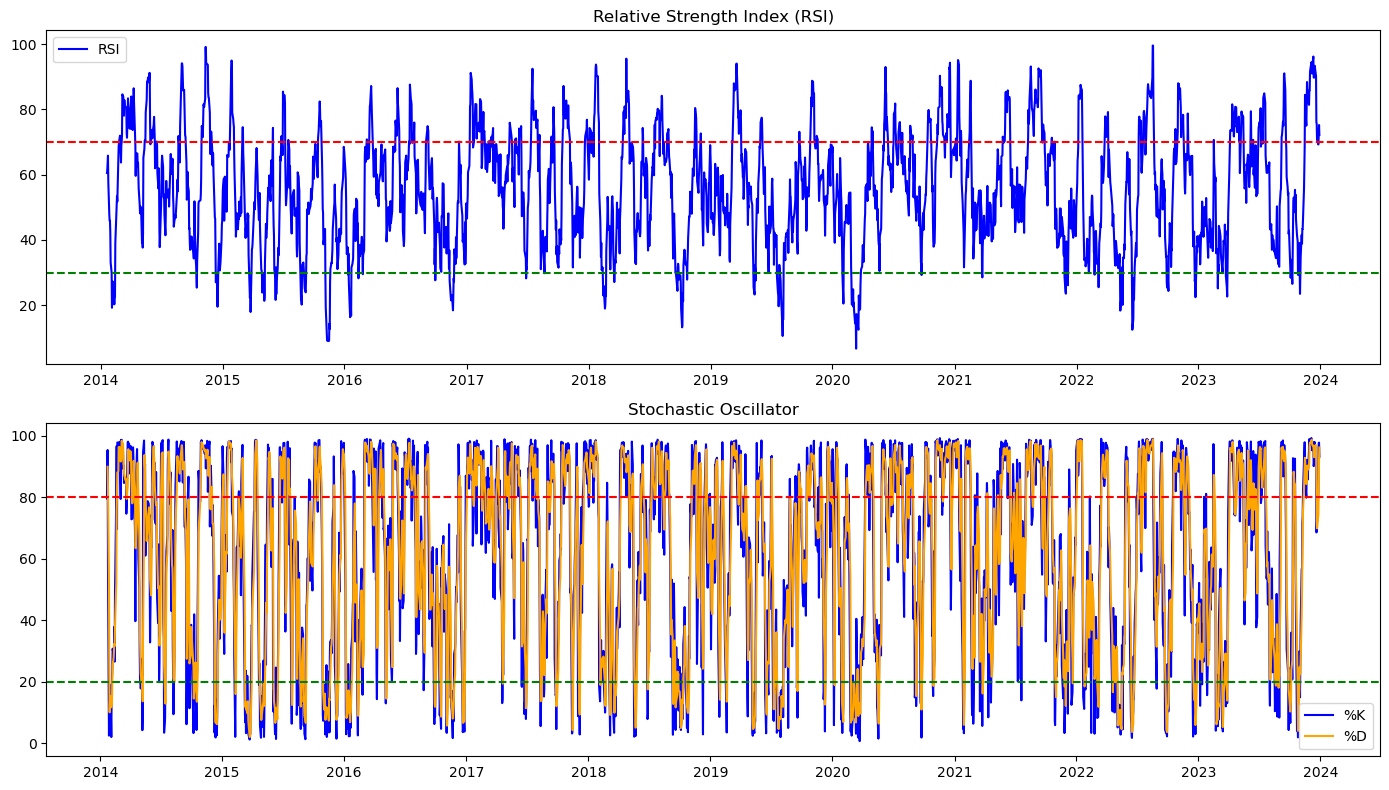

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('nifty_50_data.csv', parse_dates=True, index_col='Date')

# Convert relevant columns to numeric, coercing errors
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Stochastic Oscillator
def calculate_stochastic(data, k_window=14, d_window=3):
    L14 = data['Low'].rolling(window=k_window).min()
    H14 = data['High'].rolling(window=k_window).max()
    k = 100 * ((data['Close'] - L14) / (H14 - L14)).rolling(window=1).mean()
    d = k.rolling(window=d_window).mean()
    return k, d

# Calculate indicators
data['RSI'] = calculate_rsi(data)
data['%K'], data['%D'] = calculate_stochastic(data)

# Visualization
plt.figure(figsize=(14, 8))

# RSI Plot
plt.subplot(2, 1, 1)
plt.title('Relative Strength Index (RSI)')
plt.plot(data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

# Stochastic Oscillator Plot
plt.subplot(2, 1, 2)
plt.title('Stochastic Oscillator')
plt.plot(data['%K'], label='%K', color='blue')
plt.plot(data['%D'], label='%D', color='orange')
plt.axhline(80, linestyle='--', color='red')
plt.axhline(20, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

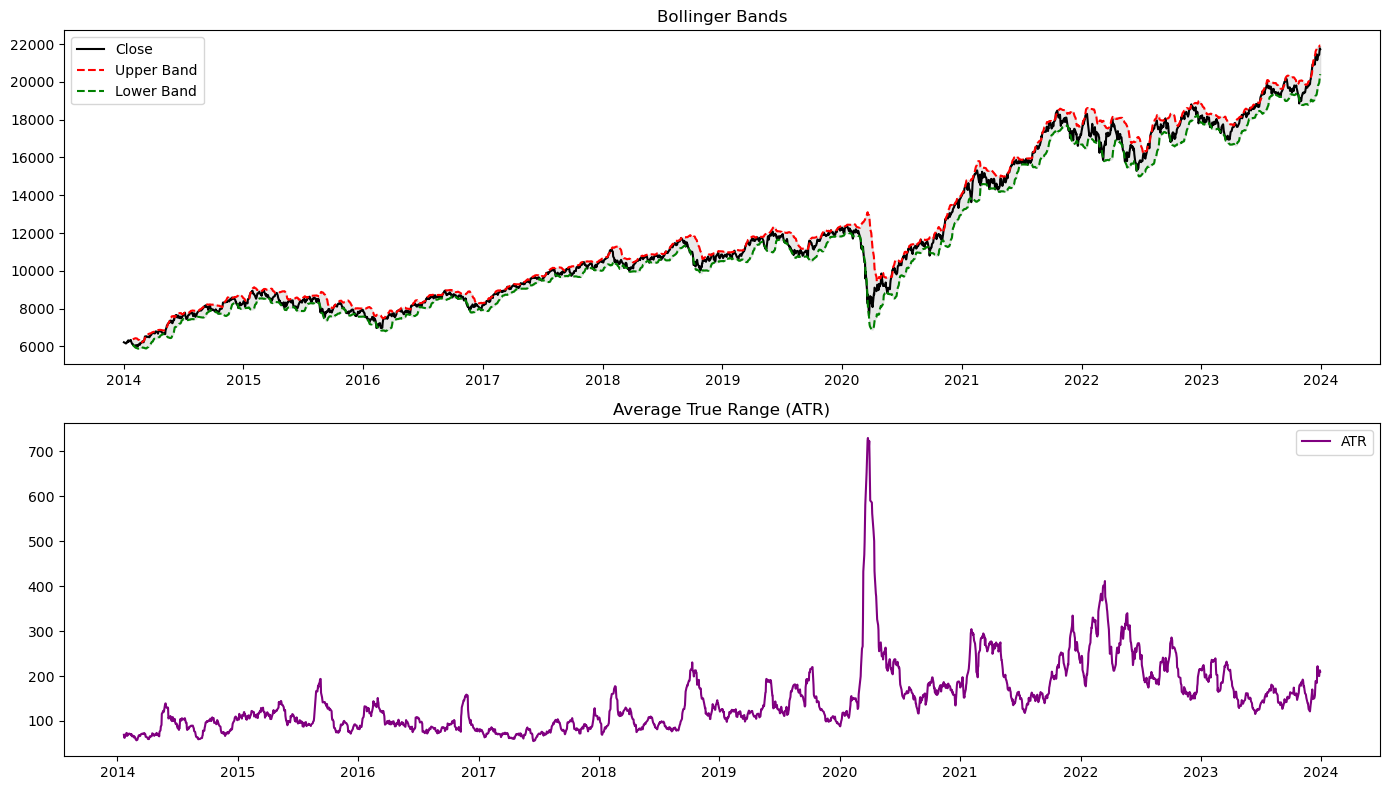

In [62]:
# Load data from CSV (if not already loaded)
data = pd.read_csv('nifty_50_data.csv', parse_dates=True, index_col='Date')

# Convert relevant columns to numeric, coercing errors
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data['Close'].rolling(window=window).mean()
    rstd = data['Close'].rolling(window=window).std()
    upper_band = sma + (2 * rstd)
    lower_band = sma - (2 * rstd)
    return upper_band, lower_band

# Calculate ATR
def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_prev_close = (data['High'] - data['Close'].shift()).abs()
    low_prev_close = (data['Low'] - data['Close'].shift()).abs()
    tr = pd.concat([high_low, high_prev_close, low_prev_close], axis=1).max(axis=1)
    atr = tr.rolling(window=window).mean()
    return atr

# Calculate indicators
data['Upper Band'], data['Lower Band'] = calculate_bollinger_bands(data)
data['ATR'] = calculate_atr(data)

# Visualization
plt.figure(figsize=(14, 8))

# Bollinger Bands Plot
plt.subplot(2, 1, 1)
plt.title('Bollinger Bands')
plt.plot(data['Close'], label='Close', color='black')
plt.plot(data['Upper Band'], label='Upper Band', linestyle='--', color='red')
plt.plot(data['Lower Band'], label='Lower Band', linestyle='--', color='green')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='lightgray', alpha=0.5)
plt.legend()

# ATR Plot
plt.subplot(2, 1, 2)
plt.title('Average True Range (ATR)')
plt.plot(data['ATR'], label='ATR', color='purple')
plt.legend()

plt.tight_layout()
plt.show()

NaN values after conversion:
Close     1
High      1
Low       1
Open      0
Volume    1
dtype: int64


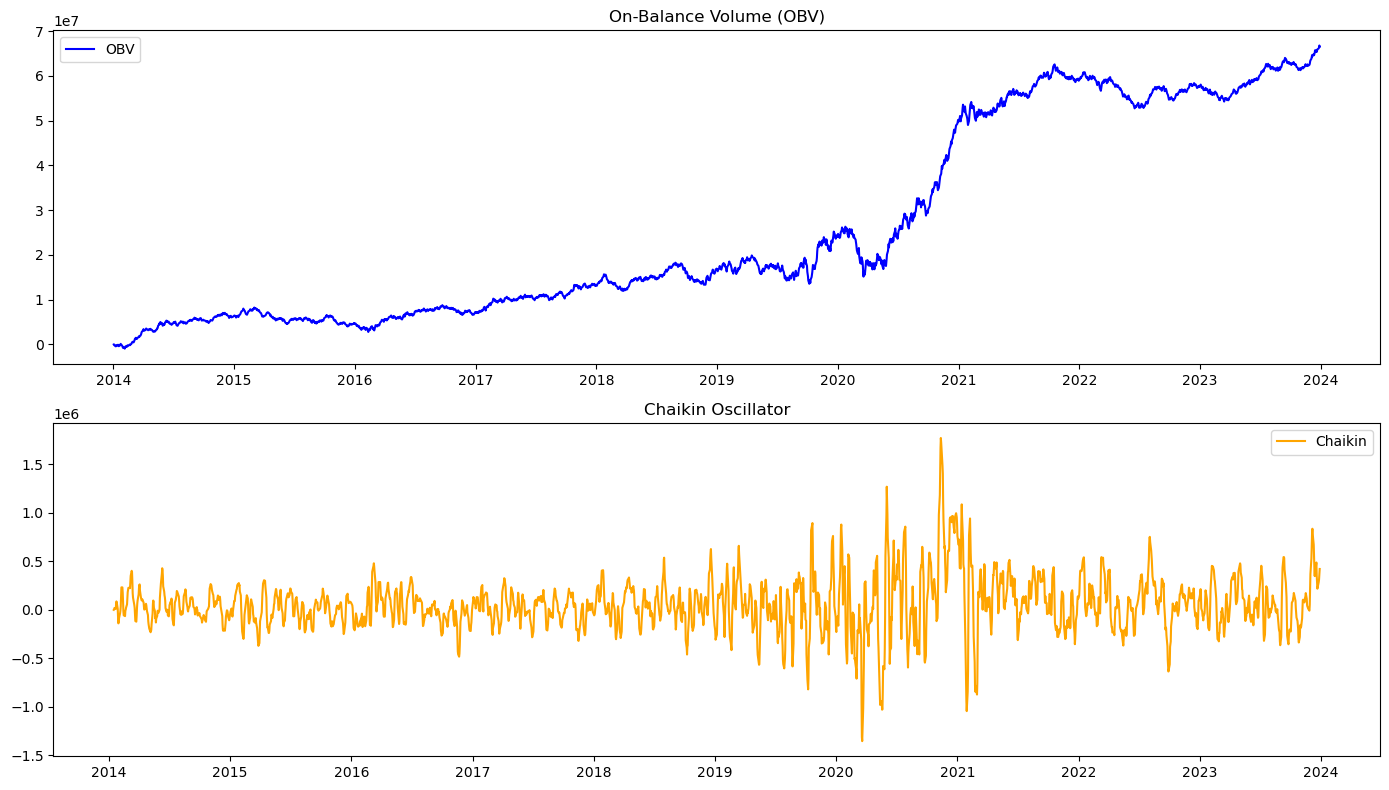

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('nifty_50_data.csv', parse_dates=True, index_col='Date')

# Convert relevant columns to numeric, coercing errors to NaN
for column in ['Close', 'High', 'Low', 'Volume']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check for NaN values after conversion
print("NaN values after conversion:")
print(data.isna().sum())

# Drop rows with NaN values (if necessary)
data.dropna(inplace=True)

# Calculate OBV
def calculate_obv(data):
    obv = pd.Series(index=data.index)
    obv.iloc[0] = 0  # Use iloc to set by position
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] + data['Volume'].iloc[i]
        elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] - data['Volume'].iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i - 1]
    return obv

# Calculate Chaikin Oscillator
def calculate_chaikin(data, window_short=3, window_long=10):
    ad_line = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
    ad_line = ad_line.cumsum()
    
    chaikin = ad_line.rolling(window=window_short).mean() - ad_line.rolling(window=window_long).mean()
    return chaikin

# Calculate indicators
data['OBV'] = calculate_obv(data)
data['Chaikin'] = calculate_chaikin(data)

# Visualization
plt.figure(figsize=(14, 8))

# OBV Plot
plt.subplot(2, 1, 1)
plt.title('On-Balance Volume (OBV)')
plt.plot(data['OBV'], label='OBV', color='blue')
plt.legend()

# Chaikin Oscillator Plot
plt.subplot(2, 1, 2)
plt.title('Chaikin Oscillator')
plt.plot(data['Chaikin'], label='Chaikin', color='orange')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
import pandas as pd
import numpy as np

# Load data from CSV
data = pd.read_csv('nifty_50_data.csv', parse_dates=True, index_col='Date')

# Convert relevant columns to numeric, coercing errors to NaN
for column in ['Close', 'High', 'Low', 'Volume']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values (if necessary)
data.dropna(inplace=True)

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Stochastic Oscillator
def calculate_stochastic(data, k_window=14, d_window=3):
    L14 = data['Low'].rolling(window=k_window).min()
    H14 = data['High'].rolling(window=k_window).max()
    k = 100 * ((data['Close'] - L14) / (H14 - L14)).rolling(window=1).mean()
    d = k.rolling(window=d_window).mean()
    return k, d

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data['Close'].rolling(window=window).mean()
    rstd = data['Close'].rolling(window=window).std()
    upper_band = sma + (2 * rstd)
    lower_band = sma - (2 * rstd)
    return upper_band, lower_band

# Calculate ATR
def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_prev_close = (data['High'] - data['Close'].shift()).abs()
    low_prev_close = (data['Low'] - data['Close'].shift()).abs()
    tr = pd.concat([high_low, high_prev_close, low_prev_close], axis=1).max(axis=1)
    atr = tr.rolling(window=window).mean()
    return atr

# Calculate OBV
def calculate_obv(data):
    obv = pd.Series(index=data.index)
    obv.iloc[0] = 0  # Use iloc to set by position
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] + data['Volume'].iloc[i]
        elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] - data['Volume'].iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i - 1]
    return obv

# Calculate Chaikin Oscillator
def calculate_chaikin(data, window_short=3, window_long=10):
    ad_line = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
    ad_line = ad_line.cumsum()
    chaikin = ad_line.rolling(window=window_short).mean() - ad_line.rolling(window=window_long).mean()
    return chaikin

# Calculate all indicators
data['RSI'] = calculate_rsi(data)
data['%K'], data['%D'] = calculate_stochastic(data)
data['Upper Band'], data['Lower Band'] = calculate_bollinger_bands(data)
data['ATR'] = calculate_atr(data)
data['OBV'] = calculate_obv(data)
data['Chaikin'] = calculate_chaikin(data)

# Save to CSV
output_file = 'nifty_50_with_indicators.csv'
data.to_csv(output_file)

print(f"Indicator data has been saved to {output_file}")

Indicator data has been saved to nifty_50_with_indicators.csv


In [70]:
import pandas as pd
import numpy as np

# Load data from CSV
data = pd.read_csv('nifty_50_data.csv', parse_dates=True, index_col='Date')

# Convert relevant columns to numeric, coercing errors to NaN
for column in ['Close', 'High', 'Low', 'Volume']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values (if necessary)
data.dropna(inplace=True)

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Stochastic Oscillator
def calculate_stochastic(data, k_window=14, d_window=3):
    L14 = data['Low'].rolling(window=k_window).min()
    H14 = data['High'].rolling(window=k_window).max()
    k = 100 * ((data['Close'] - L14) / (H14 - L14)).rolling(window=1).mean()
    d = k.rolling(window=d_window).mean()
    return k, d

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data['Close'].rolling(window=window).mean()
    rstd = data['Close'].rolling(window=window).std()
    upper_band = sma + (2 * rstd)
    lower_band = sma - (2 * rstd)
    return upper_band, lower_band

# Calculate ATR
def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_prev_close = (data['High'] - data['Close'].shift()).abs()
    low_prev_close = (data['Low'] - data['Close'].shift()).abs()
    tr = pd.concat([high_low, high_prev_close, low_prev_close], axis=1).max(axis=1)
    atr = tr.rolling(window=window).mean()
    return atr

# Calculate OBV
def calculate_obv(data):
    obv = pd.Series(index=data.index)
    obv.iloc[0] = 0  # Use iloc to set by position
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] + data['Volume'].iloc[i]
        elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
            obv.iloc[i] = obv.iloc[i - 1] - data['Volume'].iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i - 1]
    return obv

# Calculate Chaikin Oscillator
def calculate_chaikin(data, window_short=3, window_long=10):
    ad_line = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
    ad_line = ad_line.cumsum()
    chaikin = ad_line.rolling(window=window_short).mean() - ad_line.rolling(window=window_long).mean()
    return chaikin

# Calculate Moving Averages
def calculate_sma(data, window=20):
    return data['Close'].rolling(window=window).mean()

def calculate_ema(data, window=20):
    return data['Close'].ewm(span=window, adjust=False).mean()

# Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    macd_line = calculate_ema(data, short_window) - calculate_ema(data, long_window)
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

# Calculate all indicators
data['RSI'] = calculate_rsi(data)
data['%K'], data['%D'] = calculate_stochastic(data)
data['Upper Band'], data['Lower Band'] = calculate_bollinger_bands(data)
data['ATR'] = calculate_atr(data)
data['OBV'] = calculate_obv(data)
data['Chaikin'] = calculate_chaikin(data)
data['SMA'] = calculate_sma(data, window=20)
data['EMA'] = calculate_ema(data, window=20)
data['MACD Line'], data['Signal Line'], data['MACD Histogram'] = calculate_macd(data)

# Save to CSV
output_file = 'nifty_50_with_all_indicators.csv'
data.to_csv(output_file)

print(f"All indicator data has been saved to {output_file}")

All indicator data has been saved to nifty_50_with_all_indicators.csv


In [72]:
import pandas as pd

# Load your indicator CSV file
# Replace 'path_to_your_file.csv' with the actual file path
file_path = 'nifty_50_with_all_indicators.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Display the column names
print("Column Names:")
print(df.columns.tolist())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Display the first few rows of the dataset
print("\nSample Data:")
print(df.head())

Column Names:
['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram']

Data Types:
Date               object
Close             float64
High              float64
Low               float64
Open              float64
Volume            float64
RSI               float64
%K                float64
%D                float64
Upper Band        float64
Lower Band        float64
ATR               float64
OBV               float64
Chaikin           float64
SMA               float64
EMA               float64
MACD Line         float64
Signal Line       float64
MACD Histogram    float64
dtype: object

Sample Data:
         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  622

In [74]:
import pandas as pd

# Load your indicator CSV file
file_path = 'nifty_50_with_all_indicators.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Decide on a strategy to handle missing values
# Example: Forward fill for numeric columns
df_filled = df.fillna(method='ffill')

# (Optionally) You might want to handle non-numeric columns differently:
# df['ColumnName'].fillna(value='YourValue', inplace=True)

# Check again for missing values after filling
missing_values_after = df_filled.isnull().sum()
print("\nMissing Values After Filling:")
print(missing_values_after[missing_values_after > 0])

# Output the cleaned dataset's size
print("\nCleaned Dataset Size:")
print(f"Rows: {len(df_filled)}")

# You can then proceed to the Train-Test Split as previously discussed

Missing Values in Each Column:
RSI           13
%K            13
%D            15
Upper Band    19
Lower Band    19
ATR           13
Chaikin        9
SMA           19
dtype: int64

Missing Values After Filling:
RSI           13
%K            13
%D            15
Upper Band    19
Lower Band    19
ATR           13
Chaikin        9
SMA           19
dtype: int64

Cleaned Dataset Size:
Rows: 2453


C:\Users\prana\AppData\Local\Temp\ipykernel_20360\1194456308.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


In [76]:
# Handling remaining missing values with different strategies

# 1. Backward fill
df_backward_filled = df.fillna(method='bfill')

# 2. Mean/Median imputation (choose one):
df_mean_filled = df.fillna(df.mean())
df_median_filled = df.fillna(df.median())

# 3. Interpolate (linear interpolation)
df_interpolated = df.interpolate(method='linear')

# (Optional) Check how many are still missing
missing_values_after_backward = df_backward_filled.isnull().sum()
missing_values_after_mean = df_mean_filled.isnull().sum()
missing_values_after_median = df_median_filled.isnull().sum()
missing_values_after_interpolate = df_interpolated.isnull().sum()

# Output missing values after different strategies
print("Missing Values After Backward Fill:")
print(missing_values_after_backward[missing_values_after_backward > 0])

print("\nMissing Values After Mean Fill:")
print(missing_values_after_mean[missing_values_after_mean > 0])

print("\nMissing Values After Median Fill:")
print(missing_values_after_median[missing_values_after_median > 0])

print("\nMissing Values After Interpolation:")
print(missing_values_after_interpolate[missing_values_after_interpolate > 0])

# You can choose to proceed with one of these filled datasets
# For example, using the mean-filled dataset for further steps
df_cleaned = df_mean_filled.copy()  # Or choose df_interpolated, etc.

# Proceed with the Train-Test Split as previously discussed

Missing Values After Backward Fill:
Series([], dtype: int64)

Missing Values After Mean Fill:
Series([], dtype: int64)

Missing Values After Median Fill:
Series([], dtype: int64)

Missing Values After Interpolation:
RSI           13
%K            13
%D            15
Upper Band    19
Lower Band    19
ATR           13
Chaikin        9
SMA           19
dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_20360\2006075370.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_filled = df.fillna(method='bfill')


In [78]:
import pandas as pd

# Step 1: Load your indicator CSV file
file_path = 'nifty_50_with_all_indicators.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Inspect missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Step 3: Handle missing values using your preferred method
# Example: Fill with mean values
df_filled = df.fillna(df.mean())

# Alternatively, you can use other strategies as discussed (e.g., forward fill, interpolation)
# df_filled = df.fillna(method='ffill')
# df_filled = df.interpolate(method='linear')
# df_filled = df.dropna()  # if you choose to truncate

# Check again for missing values
print("\nMissing Values After Filling:")
print(df_filled.isnull().sum())

# Step 4: Optionally save the modified DataFrame
df_filled.to_csv('eros_indicators.csv')  # Save to a new CSV file

# Output cleaned dataset's size
print("\nCleaned Dataset Size:")
print(f"Rows: {len(df_filled)}")

# Step 5: You can now proceed with train-test split etc.
# Split example can be added here as discussed previously

Missing Values in Each Column:
RSI           13
%K            13
%D            15
Upper Band    19
Lower Band    19
ATR           13
Chaikin        9
SMA           19
dtype: int64

Missing Values After Filling:
Close             0
High              0
Low               0
Open              0
Volume            0
RSI               0
%K                0
%D                0
Upper Band        0
Lower Band        0
ATR               0
OBV               0
Chaikin           0
SMA               0
EMA               0
MACD Line         0
Signal Line       0
MACD Histogram    0
dtype: int64

Cleaned Dataset Size:
Rows: 2453


    FEATURE SELECTION

Train-Test Split

In [91]:
import pandas as pd

# Load your cleaned indicator CSV file
file_path = 'eros_indicators.csv'  # Update with your actual file name
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Determine the split point (80%-20%)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Perform Train-Test Split based on time
train_set = df[:split_index]
test_set = df[split_index:]

# Output the sizes of the splits
train_size = len(train_set)
test_size = len(test_set)

print(f'Train Size: {train_size}, Test Size: {test_size}')

Train Size: 1962, Test Size: 491


In [100]:
# Assuming test_set is your DataFrame containing test data
test_set.to_csv('Train-Test Split_data.csv', index=False)  # Save without row indices

Sequence and Target Creation

In [96]:
import pandas as pd
import numpy as np

def create_sequences(data, sequence_length=10, multi_output_steps=1):
    sequences = []
    targets = []
    
    # Iterate through the data to create sequences and targets
    for i in range(len(data) - sequence_length - multi_output_steps + 1):
        sequences.append(data[i:i + sequence_length].values)  # Fixed sequence length
        targets.append(data[i + sequence_length:i + sequence_length + multi_output_steps]['Close'].values)  # Multi-output target for 'Close'
    
    return np.array(sequences), np.array(targets)

# Load the data from CSV files
train_set_path = 'eros_indicators.csv'  # Replace with your actual path
test_set_path = 'eros_indicators.csv'    # Replace with your actual path

train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

# Example of using the function for training
X_train, y_train = create_sequences(train_set, sequence_length=10, multi_output_steps=3)  # Adjust these parameters as needed

# Example of using the function for testing
X_test, y_test = create_sequences(test_set, sequence_length=10, multi_output_steps=3)  # Ensure the same sequence parameters

# Output the shapes of the resulting arrays
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (2441, 10, 19), y_train shape: (2441, 3)
X_test shape: (2441, 10, 19), y_test shape: (2441, 3)


In [98]:
# Assuming test_set is your DataFrame containing test data
test_set.to_csv('Sequence and Target Creation_data.csv', index=False)  # Save without row indices

Rolling Window Validation

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'eros_indicators.csv'  # Your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Drop the 'Date' column if it's not being used as a feature
data = data.drop(columns=['Date'])

# Parameters for rolling window
train_size = 1000  # Training size
test_size = 100     # Testing size
num_windows = 5     # Number of rolling windows

# Store results
results = []

# Start rolling window validation
for i in range(num_windows):
    train_start = i * test_size
    train_end = train_start + train_size
    
    # Ensure we do not go out of bounds
    if train_end > len(data):
        break
    
    test_start = train_end
    test_end = test_start + test_size

    # Create training and test sets
    train_set = data.iloc[train_start:train_end]  # Use iloc to ensure numeric indexing
    test_set = data.iloc[test_start:test_end]

    # Define features and target
    X_train = train_set.drop('Close', axis=1)  # Replace 'Close' with the target column's name if different
    y_train = train_set['Close']
    X_test = test_set.drop('Close', axis=1)
    y_test = test_set['Close']

    # Train a model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate performance (using RMSE as the metric)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    results.append(rmse)

# Output the RMSE for each rolling window
print(f'RMSE for each rolling window: {results}')

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [114]:
# Assuming test_set is your DataFrame containing test data
test_set.to_csv('Rolling Window Validation.csv', index=False)  # Save without row indices

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# ... (rest of your existing code)

# Each rolling window evaluation
for i in range(num_windows):
    # ... (training and testing code)

    # Original RMSE calculation with warning
    # rmse = mean_squared_error(y_test, predictions, squared=False)
    
    # Updated RMSE calculation to avoid future warnings
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5  # Take the square root to get RMSE
    results.append(rmse)

# Output the RMSE for each rolling window
print(f'RMSE for each rolling window: {results}')

RMSE for each rolling window: [19.20521034918083, 25.07944093350007, 20.458546076714377, 29.088166831046184, 22.96576183752371, 22.96576183752371, 22.96576183752371, 22.96576183752371, 22.96576183752371, 22.96576183752371]


                Feature scaling

In [109]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'eros_indicators.csv'  # Your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Drop the 'Date' column for scaling
data = data.drop(columns=['Date'])

# Separate features and target
X = data.drop('Close', axis=1)  # Features (all columns except 'Close')
y = data['Close']                # Target (the 'Close' column)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the features and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier analysis, keeping the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# If you want to keep the target variable (y) separated, you can do it here
# y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Optionally scale the target

# Display the first few rows of the scaled features
print("Scaled Features:")
print(X_scaled_df.head())

# Next steps: Use X_scaled_df in your machine learning models

Original Data:
         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA  

In [116]:
# Assuming test_set is your DataFrame containing test data
test_set.to_csv('Feature_scaling.csv', index=False)  # Save without row indices

SMOTE Handling Class Imbalance

In [112]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'eros_indicators.csv'  # Your CSV file path
data = pd.read_csv(file_path)

# Drop the 'Date' column
data = data.drop(columns=['Date'])

# Create target: example: moving up (1) or down (0)
data['Direction'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # Drop the last row which would have NaN

# Features and target variable
X = data.drop(columns=['Close', 'Direction'])  # Features
y = data['Direction']                          # Target

# Scaling Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert back to DataFrame for easier handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Display the number of samples in each class before and after SMOTE
print(f'Original class distribution:\n{y.value_counts()}')
print(f'Resampled class distribution:\n{pd.Series(y_resampled).value_counts()}')

# Now you can proceed to use X_resampled_df and y_resampled for model training

Original class distribution:
Direction
1    1333
0    1120
Name: count, dtype: int64
Resampled class distribution:
Direction
0    1333
1    1333
Name: count, dtype: int64


In [118]:
# Assuming test_set is your DataFrame containing test data
test_set.to_csv('SMOTE Handling Class Imbalance.csv', index=False)  # Save without row indices

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'eros_indicators.csv'  # Your CSV file path
data = pd.read_csv(file_path)

# Step 1: Prepare the data
data = data.drop(columns=['Date'])  # Drop the 'Date' column

# Create target: example: moving up (1) or down (0)
data['Direction'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # Drop the last row which would have NaN

# Features and target variable
X = data.drop(columns=['Close', 'Direction'])  # Features
y = data['Direction']                          # Target

# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Handling Class Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 4: Rolling Window Validation for Regression
train_size = 1000  # Training size
test_size = 100     # Testing size
num_windows = 5     # Number of rolling windows

# Store results
results = []

for i in range(num_windows):
    train_start = i * test_size
    train_end = train_start + train_size
    
    # Ensure we do not go out of bounds
    if train_end > len(data):
        break
    
    test_start = train_end
    test_end = test_start + test_size

    # Create training and test sets
    X_train = X_resampled[train_start:train_end]
    y_train = y_resampled[train_start:train_end]
    X_test = X_resampled[test_start:test_end]
    y_test = y_resampled[test_start:test_end]

    # Train a model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test).round()  # Round to nearest class 0 or 1
    
    # Evaluate performance
    accuracy = np.mean(predictions == y_test)
    results.append(accuracy)

# Print rolling validation results
print(f'Accuracy for each rolling window: {results}')

# Step 5: Overall model evaluation on the resampled data
final_model = LinearRegression()
final_model.fit(X_resampled, y_resampled)
y_pred = final_model.predict(X_resampled).round()  # Round to nearest class

# Print classification report
print("Overall Classification Report:")
print(classification_report(y_resampled, y_pred))

Accuracy for each rolling window: [0.55, 0.56, 0.54, 0.49, 0.5]
Overall Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1333
           1       0.55      0.56      0.55      1333

    accuracy                           0.55      2666
   macro avg       0.55      0.55      0.55      2666
weighted avg       0.55      0.55      0.55      2666



In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'eros_indicators.csv'  # Your CSV file path
data = pd.read_csv(file_path)

# Prepare the data
data = data.drop(columns=['Date'])  # Drop the 'Date' column
data['Direction'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # Drop the last row which would have NaN

# Features and target variable
X = data.drop(columns=['Close', 'Direction'])  # Features
y = data['Direction']                          # Target

# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Handling Class Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Rolling Window Validation
train_size = 1000  # Training size
test_size = 100     # Testing size
num_windows = 5     # Number of rolling windows

# Store results
results = []

for i in range(num_windows):
    train_start = i * test_size
    train_end = train_start + train_size
    
    # Ensure we do not go out of bounds
    if train_end > len(data):
        break
    
    test_start = train_end
    test_end = test_start + test_size

    # Create training and test sets
    X_train = X_resampled[train_start:train_end]
    y_train = y_resampled[train_start:train_end]
    X_test = X_resampled[test_start:test_end]
    y_test = y_resampled[test_start:test_end]

    # Train a model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test).round()  # Round to nearest class 0 or 1
    
    # Evaluate performance
    accuracy = np.mean(predictions == y_test)
    results.append(accuracy)

# Print rolling validation results
print(f'Accuracy for each rolling window: {results}')

# Overall model evaluation on the resampled data
final_model = LinearRegression()
final_model.fit(X_resampled, y_resampled)
y_pred = final_model.predict(X_resampled).round()  # Round to nearest class

# Print classification report
report = classification_report(y_resampled, y_pred, output_dict=True)
class_report_df = pd.DataFrame(report).transpose()

# Save the accuracy results and classification report
accuracy_df = pd.DataFrame({'Rolling Window Accuracy': results})
accuracy_df.to_csv('rolling_window_accuracy.csv', index=False)

class_report_df.to_csv('classification_report.csv', index=True)

print("Results saved to 'rolling_window_accuracy.csv' and 'classification_report.csv'.")

Accuracy for each rolling window: [0.55, 0.56, 0.54, 0.49, 0.5]
Results saved to 'rolling_window_accuracy.csv' and 'classification_report.csv'.


LSTM MODEL



In [135]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (1000, 17)


In [147]:
import pandas as pd

# Load the dataset
data = pd.read_csv('eros_indicators.csv')

# Display the first few rows of the dataset
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [149]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns as needed
data.fillna(method='ffill', inplace=True)  # Forward fill as an option

Date              0
Close             0
High              0
Low               0
Open              0
Volume            0
RSI               0
%K                0
%D                0
Upper Band        0
Lower Band        0
ATR               0
OBV               0
Chaikin           0
SMA               0
EMA               0
MACD Line         0
Signal Line       0
MACD Histogram    0
dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_20360\546263611.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an option


In [161]:
import pandas as pd
import numpy as np

def create_sequences(data, sequence_length=10, multi_output_steps=1):
    sequences = []
    targets = []
    
    # Iterate through the data to create sequences and targets
    for i in range(len(data) - sequence_length - multi_output_steps + 1):
        sequences.append(data[i:i + sequence_length].values)  # Fixed sequence length
        targets.append(data[i + sequence_length:i + sequence_length + multi_output_steps]['Close'].values)  # Multi-output target for 'Close'
    
    return np.array(sequences), np.array(targets)

# Load the data from CSV files
train_set_path = 'eros_indicators.csv'  # Replace with your actual path
test_set_path = 'eros_indicators.csv'    # Replace with your actual path

train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

# Example of using the function for training
X_train, y_train = create_sequences(train_set, sequence_length=10, multi_output_steps=3)  # Adjust these parameters as needed

# Example of using the function for testing
X_test, y_test = create_sequences(test_set, sequence_length=10, multi_output_steps=3)  # Ensure the same sequence parameters

# Output the shapes of the resulting arrays
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (2441, 10, 19), y_train shape: (2441, 3)
X_test shape: (2441, 10, 19), y_test shape: (2441, 3)


Epoch 1/20


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0537 - val_loss: 0.0017
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - val_loss: 6.2806e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0030 - val_loss: 3.6960e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 3.4562e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - val_loss: 4.9840e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - val_loss: 5.2411e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 3.0611e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - val_loss: 4.4670e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 3.1306e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 2.9068e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/s

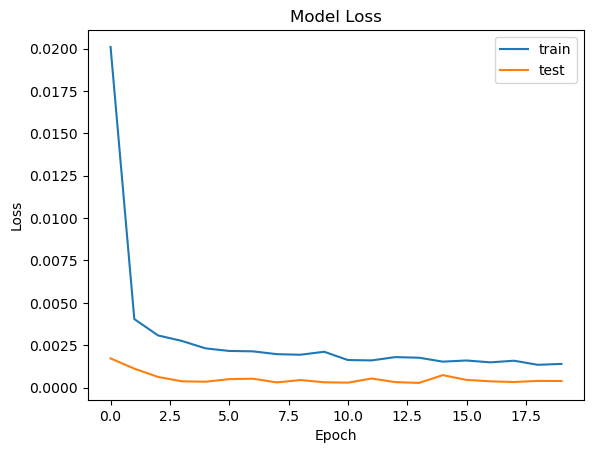

In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assume X and y are already created from previous steps
# Split into training and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on test set:", mse)

# Optionally visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


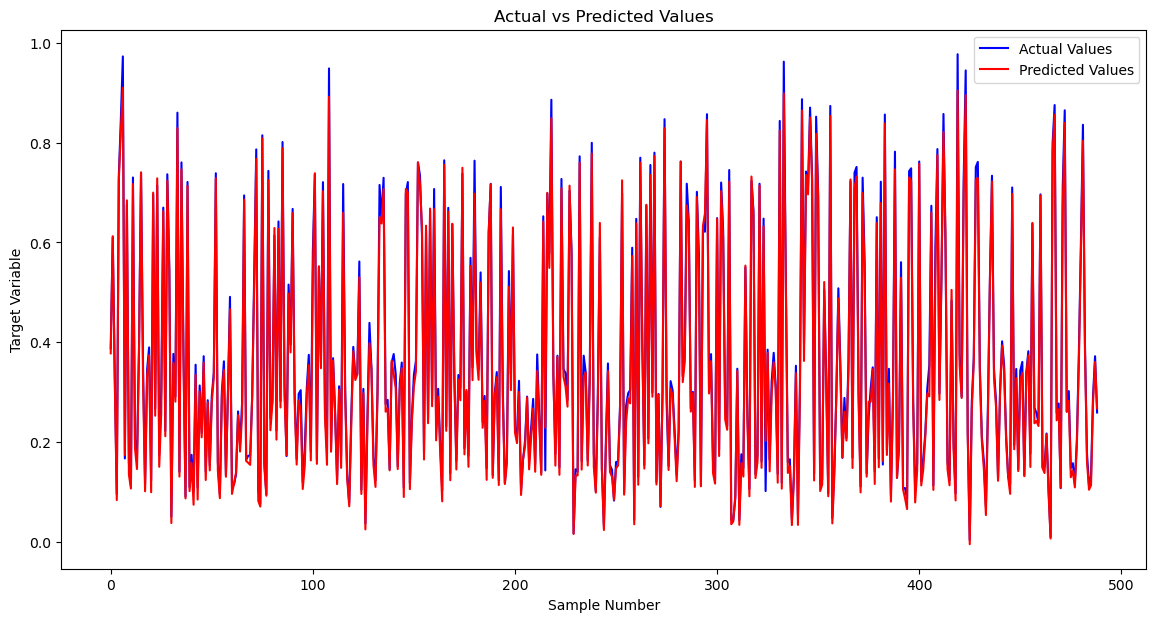

In [165]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Number")
plt.ylabel("Target Variable")
plt.legend()
plt.show()

In [167]:
model.save('lstm_modelmajor.h5')  # Save model to a file

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Multiply by 100 for percentage
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.015401517992750186
Root Mean Squared Error (RMSE): 0.019711055828125976
Mean Absolute Percentage Error (MAPE): 139.12522029668628


In [171]:
# Create a more complex LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))  # Additional Dense layer
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate and train the model
model = create_lstm_model()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0199 - val_loss: 5.1916e-04
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0028 - val_loss: 3.8116e-04
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 3.4690e-04
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024 - val_loss: 5.1307e-04
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 7.2003e-04
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 3.1915e-04
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 3.3823e-04
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 5.2773e-04
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 6.8311e-04
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 3.3964e-04
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 3.4672e-04
Epoch 12/30
62/62 ━━━━━━━━━━━━

In [173]:
# Assuming 'Close' is your target feature
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()

# Update your dataset with these new features, and then drop NaN 
data.dropna(inplace=True)

# Reprocess your data (scaling and sequences) as necessary after adding new features.

In [175]:
from keras.optimizers import Adam

# Adjust the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the new optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Retrain the model after making adjustments
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0012 - val_loss: 2.2088e-04
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5737e-04 - val_loss: 8.1099e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 7.4495e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3658e-04 - val_loss: 6.6377e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.3821e-04 - val_loss: 0.0017
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 3.9304e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8088e-04 - val_loss: 1.5704e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3297e-04 - val_loss: 1.6924e-04
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9104e-04 - val_loss: 1.5735e-04
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.5497e-04 - val_loss: 1.9020e-04
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5059e-04

In [177]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model on the train sets

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0548 - val_loss: 9.6729e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042 - val_loss: 5.1868e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - val_loss: 9.0106e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - val_loss: 3.3741e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 7.7239e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - val_loss: 3.0016e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - val_loss: 7.9937e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 3.7268e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 7.7745e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 2.8777e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 2.4253e-04
Epoch 12/20
62/62 ━━━━━━━━

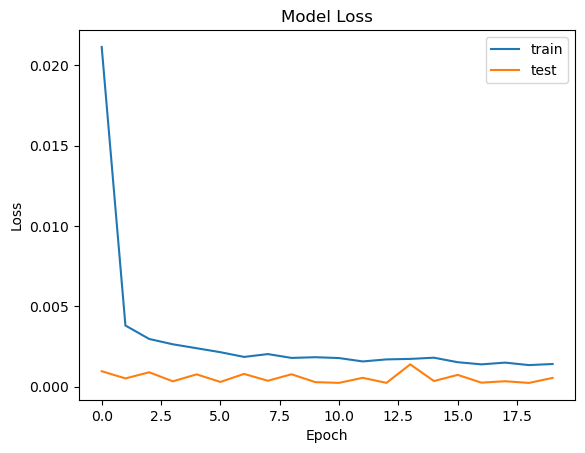

In [179]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assume X and y are already created from previous steps
# Split into training and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on test set:", mse)

# Optionally visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [189]:
# Load your trained LSTM model
model = load_model('lstm_modelmajor.h5')
# Print model summary to see input shape details
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,053 (133.02 KB)

 Trainable params: 34,051 (133.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [199]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the actual data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your file path
actual_data = pd.read_csv(file_path)

# Feature selection: Assuming you are predicting only 'Close'
feature_columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'RSI', '%K', '%D', 
                   'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin', 
                   'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram']
data = actual_data[feature_columns].values  # Make sure to include all relevant features

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM, using a fixed window size 
timesteps = 5  # Adjust this to match your training configuration
X = []
for i in range(timesteps, len(data_scaled)):
    X.append(data_scaled[i-timesteps:i, :])  # Include all features for each timestep
X = np.array(X)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))  # Ensure correct reshaping

# Load your trained LSTM model
model = load_model('lstm_modelmajor.h5')  # Change this to your model's filename

# Make predictions
predicted_scaled = model.predict(X)

# Print shape of the predictions
print("Shape of predicted output:", predicted_scaled.shape)

# Inverse transform predictions
if predicted_scaled.ndim == 2:
    # Create an array with the same shape as was fitted to scaler
    # Use NaN or zeros for unused columns, and fill the first column with predictions.
    all_features = np.zeros((predicted_scaled.shape[0], data_scaled.shape[1]))  # shape (2448, 18)
    all_features[:, 0] = predicted_scaled.flatten()  # Assuming first column is 'Close'

    # Now we inverse transform
    predicted_close = scaler.inverse_transform(all_features)
    
    # Extract 'Close' predictions
    predicted_close = predicted_close[:, 0]  # Assuming 'Close' was the first column in feature_columns
else:
    # If you were to handle 3D data in the future, handle accordingly
    predicted_close = scaler.inverse_transform(predicted_scaled.reshape(-1, predicted_scaled.shape[-1]))

# Save predictions to a DataFrame and CSV
predicted_df = pd.DataFrame(predicted_close, columns=['Predicted Close'])
predicted_df.to_csv('predicted_values.csv', index=False)

# Display the predicted values
print(predicted_df.head())

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Shape of predicted output: (2448, 1)
   Predicted Close
0      7324.596092
1      7317.573783
2      7316.741032
3      7315.985867
4      7317.803601


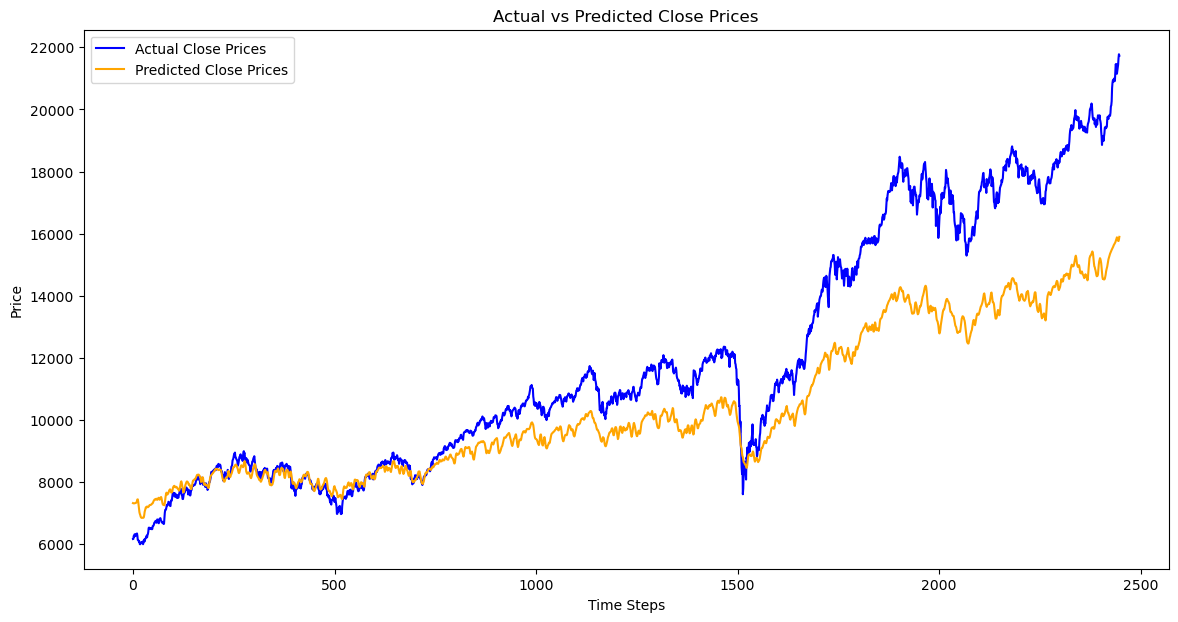

In [201]:
import matplotlib.pyplot as plt

# Assuming you have the actual 'Close' prices (this might require loading them from the original dataset)
actual_close = actual_data['Close'].values[timesteps:]  # Adjust based on window size

# Plotting Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(actual_close, label='Actual Close Prices', color='blue')
plt.plot(predicted_close, label='Predicted Close Prices', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(actual_close, predicted_close)
mae = mean_absolute_error(actual_close, predicted_close)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4869850.501819624
Mean Absolute Error: 1626.0174712100556
Root Mean Squared Error: 2206.7737767654444


In [207]:
import numpy as np

# Assume actual_close and predicted_close have been defined

# Check the shape of actual_close and predicted_close
print("Shape of actual_close:", actual_close.shape)
print("Shape of predicted_close:", predicted_close.shape)

# Check the timesteps value
timesteps = 5  # Replace with your actual value
print("Timesteps:", timesteps)

# Now check the shape after slicing
sliced_actual_close = actual_close[timesteps:]
print("Shape of sliced actual_close:", sliced_actual_close.shape)

# Calculate Absolute Errors if shapes are aligned
if sliced_actual_close.shape == predicted_close.shape:
    absolute_errors = np.abs(sliced_actual_close - predicted_close)
else:
    print("Shapes do not match. Cannot compute absolute errors.")

Shape of actual_close: (2448,)
Shape of predicted_close: (2448,)
Timesteps: 5
Shape of sliced actual_close: (2443,)
Shapes do not match. Cannot compute absolute errors.


In [211]:
# Trim predicted_close to match the sliced actual_close
trimmed_predicted_close = predicted_close[timesteps:]

# Now calculate absolute errors
absolute_errors = np.abs(actual_close[timesteps:] - trimmed_predicted_close)

Absolute Errors: [1002.98069813 1066.7234277  1029.68307797 ... 5891.97663929 5963.78653112
 5833.58126416]


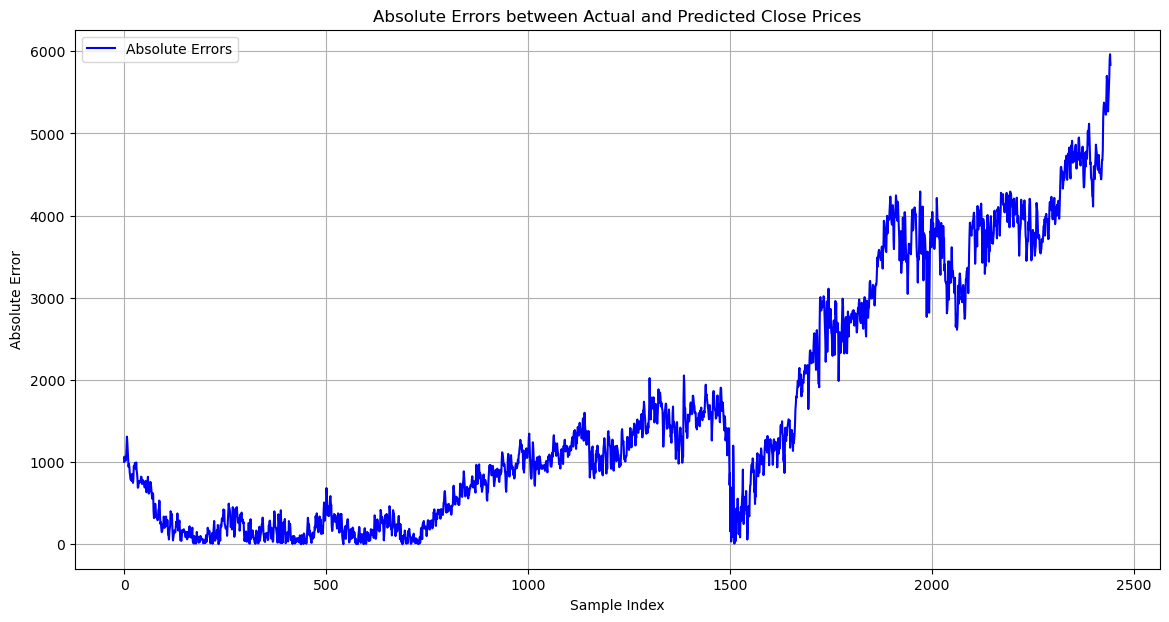

Mean Absolute Error (MAE): 1627.1278630534503


In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming absolute_errors has been calculated

# Print absolute errors
print("Absolute Errors:", absolute_errors)

# Plotting Absolute Errors
plt.figure(figsize=(14, 7))
plt.plot(absolute_errors, label='Absolute Errors', color='blue')
plt.title('Absolute Errors between Actual and Predicted Close Prices')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid()
plt.show()

# Optional: Calculate and print MAE
mae = np.mean(absolute_errors)
print("Mean Absolute Error (MAE):", mae)

In [218]:
pip install numpy pandas matplotlib scikit-learn keras tensorflow ta-lib

  Using cached ta_lib-0.6.1.tar.gz (372 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build ta-lib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [32 lines of output]
  <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
  C:\Users\prana\AppData\Local\Temp\pip-build-env-q6fnaeii\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:81: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
    corresp(dist, value, root_dir)
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-312\talib
  copying talib\__init__.py -> build\lib.win-amd64-cpython-312\talib
  running egg_info
  writing ta_lib.egg-info\PKG-INFO
  writing dependency_links to ta_lib.egg-info\dependency_links.txt
  writing requirements to ta_lib.egg-info\requires.txt
  writing top-level names to t

In [242]:
pip install pandas-ta

Note: you may need to restart the kernel to use updated packages.


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta  # Importing the pandas_ta library
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your historical price data
data = pd.read_csv('eros_indicators.csv')  # Replace with your CSV file path
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
data.set_index('Date', inplace=True)

# Calculate Trend Indicators
data['SMA'] = ta.sma(data['Close'], length=30)  # Simple Moving Average
data['EMA'] = ta.ema(data['Close'], length=30)  # Exponential Moving Average




# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'SMA', 'EMA')]

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 0])  # First column corresponds to 'Close'

X, y = np.array(X), np.array(y)

# Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predicting a single value (next close price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], 5))), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices)
mae = mean_absolute_error(y_test, predicted_prices)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Trend Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (149609717.py, line 27)

In [266]:
import pandas as pd

# Path to your CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path

# Load the CSV into a DataFrame
macd_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the DataFrame
print(macd_data.head())

                  Close         High          Low         Open    Volume  \
Date                                                                       
2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

                  RSI         %K         %D    Upper Band    Lower Band  \
Date                                                                      
2014-01-02  56.057072  61.212029  61.188646  12283.947469  11496.117508   
2014-01-03  56.057072  61.212029  61.188646  12283.947469  11496.117508   
2014-01-06  56.057072  61.212029  61.188646  12283.947469  11496.117508   
2014-01-07  56.057072  61.212029  61.188646  12283.947469  11496.117508   
2014-01-08  56.05

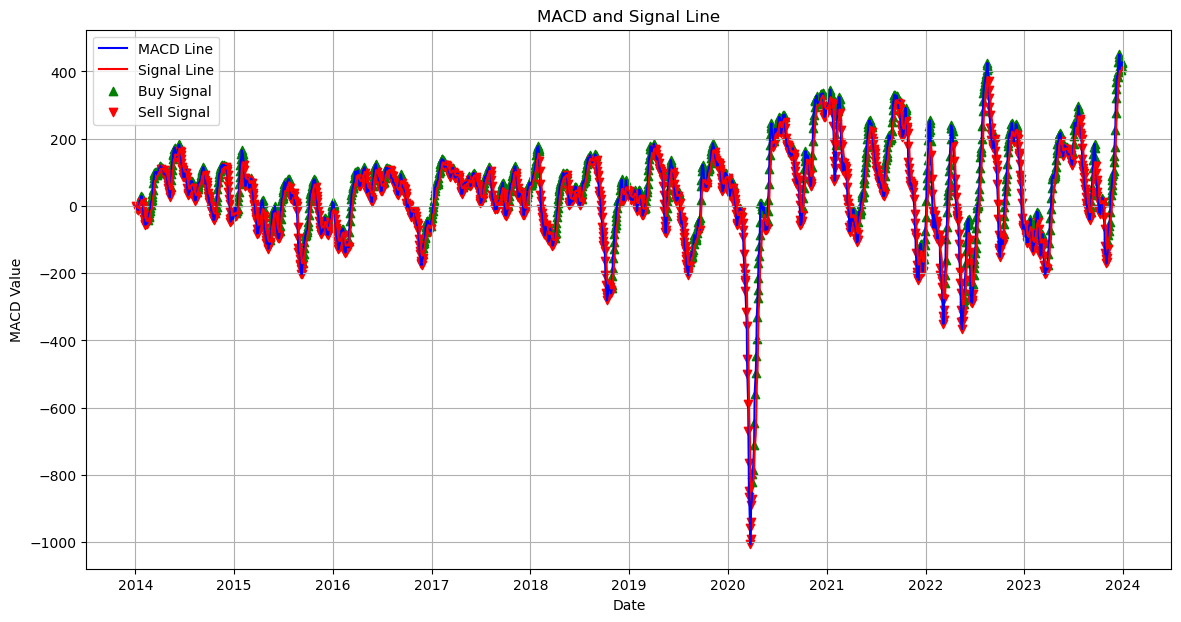

In [268]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot MACD Line and Signal Line
plt.plot(macd_data.index, macd_data['MACD Line'], label='MACD Line', color='blue')
plt.plot(macd_data.index, macd_data['Signal Line'], label='Signal Line', color='red')

# Highlighting Buy/Sell Signals
# Buy Signal: When MACD Line crosses above Signal Line
buy_signals = macd_data[macd_data['MACD Line'] > macd_data['Signal Line']]
sell_signals = macd_data[macd_data['MACD Line'] < macd_data['Signal Line']]

plt.scatter(buy_signals.index, buy_signals['MACD Line'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['MACD Line'], marker='v', color='red', label='Sell Signal', alpha=1)

# Adding titles and labels
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid()
plt.show()

In [280]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Load your historical price data
data = pd.read_csv('eros_indicators.csv')  # Replace with your CSV file path
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
data.set_index('Date', inplace=True)
# Assume `macd_data` is your DataFrame
# Selecting relevant features
features = macd_data[['SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram']]

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Assuming we want to predict the first feature (SMA)
    return np.array(X), np.array(y)

# Define time step (number of previous data points to use for predictions)
time_step = 10
X, y = create_dataset(scaled_data, time_step)

In [282]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [286]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch size as needed

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0332
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - lo

In [296]:


# Create an array to hold predictions with the correct shape
predictions_scaled = np.zeros((predictions.shape[0], scaled_data.shape[1]))  # Same number of features as scaled_data
predictions_scaled[:, 0] = predictions.squeeze()  # Assuming we are predicting the first feature (SMA)

# Inverse transform
predictions_inverse = scaler.inverse_transform(predictions_scaled)  # Use the full array for inverse scaling

# Extract only the predicted target feature (SMA)
predicted_sma = predictions_inverse[:, 0]  # Assuming SMA is the first feature

# Now, you can continue with the evaluation or plotting

Root Mean Square Error: 0.023243045387326463


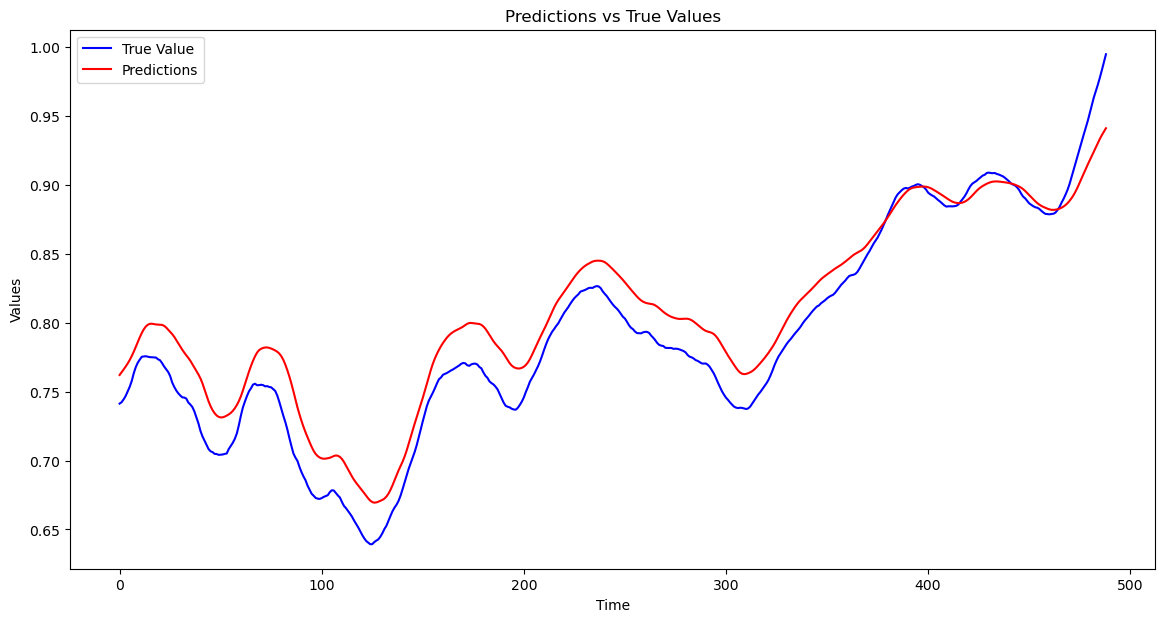

In [298]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error: {rmse}')

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Value', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.title('Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [308]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_sma)
print(f'Mean Absolute Error: {mae}')

# Calculating Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - predicted_sma) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Calculating R-squared Score
r2 = r2_score(y_test, predicted_sma)
print(f'R-squared Score: {r2:.4f}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error: {rmse}')

Mean Absolute Error: 18242.707473004157
Mean Absolute Percentage Error (MAPE): 2321740.70%
R-squared Score: -56864243717.1710
Root Mean Square Error: 0.023243045387326463


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Remove the 'Date' column and set 'Close' as the target variable
target_column = 'Close'
X = data.drop(columns=['Date', target_column])  # Drop 'Date' and target column from features
y = data[target_column].values  # Target variable

# Scale the data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Reshape X for LSTM input shape should be [samples, timesteps, features]
timesteps = 1  # Adjust as needed if you're using time series
X_train = X_scaled.reshape((X_scaled.shape[0], timesteps, X_scaled.shape[1]))

# Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate and train model directly
model = create_lstm_model()
history = model.fit(X_train, y_scaled, epochs=100, batch_size=32, verbose=1)

# Predict using the trained model
predictions = model.predict(X_train)

# Inverse transform predictions to get original scale
predictions_inverse = scaler_y.inverse_transform(predictions)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0969
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 15/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoc

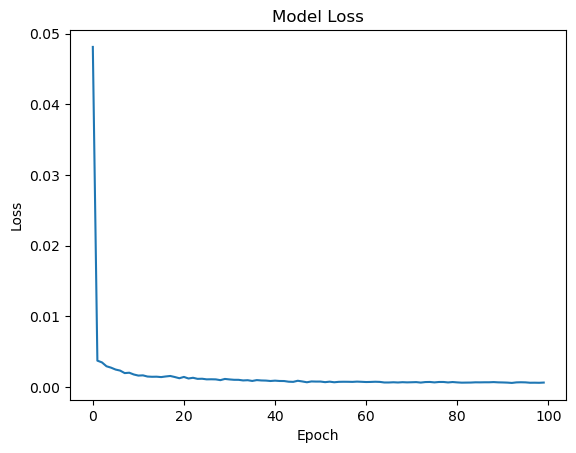

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [13]:
model.save('lstm_model1.h5')  # Save the model

Mean Squared Error: 0.00017548776421491265


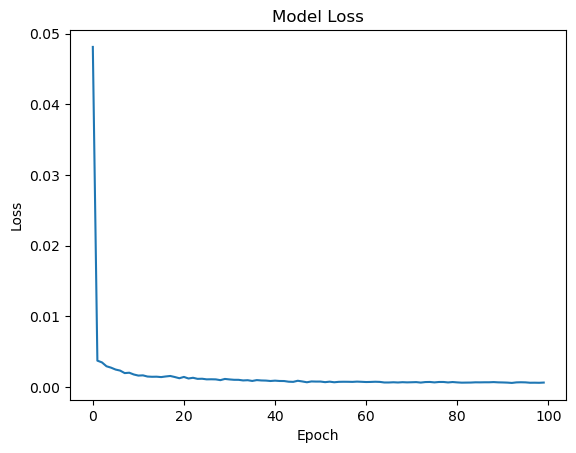

In [15]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_scaled, predictions)
print(f'Mean Squared Error: {mse}')

# Plot training loss (assuming you want to visualize loss)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

using lstm with Momentum Indicators:
	•	RSI, Stochastic Oscillator.
 

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1456
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0665
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0635
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0659
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0649
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0628
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0638
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0638
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0643
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0648
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0646
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0648
Epoch 15/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0643
Epoch 16/100
77/

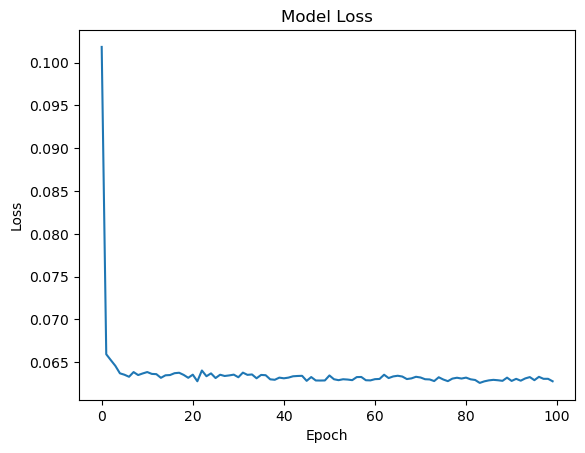

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Specify the features (RSI, %K, %D) and target variable (Close)
feature_columns = ['RSI', '%K', '%D']
target_column = 'Close'

# Prepare the feature and target data
X = data[feature_columns].values  # Select only the specified columns
y = data[target_column].values     # Target variable

# Scale the features and target variable
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Reshape X for LSTM input shape should be [samples, timesteps, features]
timesteps = 1  # Adjust as needed if you're using time series
X_train = X_scaled.reshape((X_scaled.shape[0], timesteps, X_scaled.shape[1]))

# Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate and train model directly
model = create_lstm_model()
history = model.fit(X_train, y_scaled, epochs=100, batch_size=32, verbose=1)

# Predicting using the trained model
predictions = model.predict(X_train)

# Inverse transform predictions to get original scale
predictions_inverse = scaler_y.inverse_transform(predictions)

# Calculate Mean Squared Error
mse = mean_squared_error(y, predictions_inverse)
print(f'Mean Squared Error: {mse}')

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0711
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0311
Epoch 16/100
62/

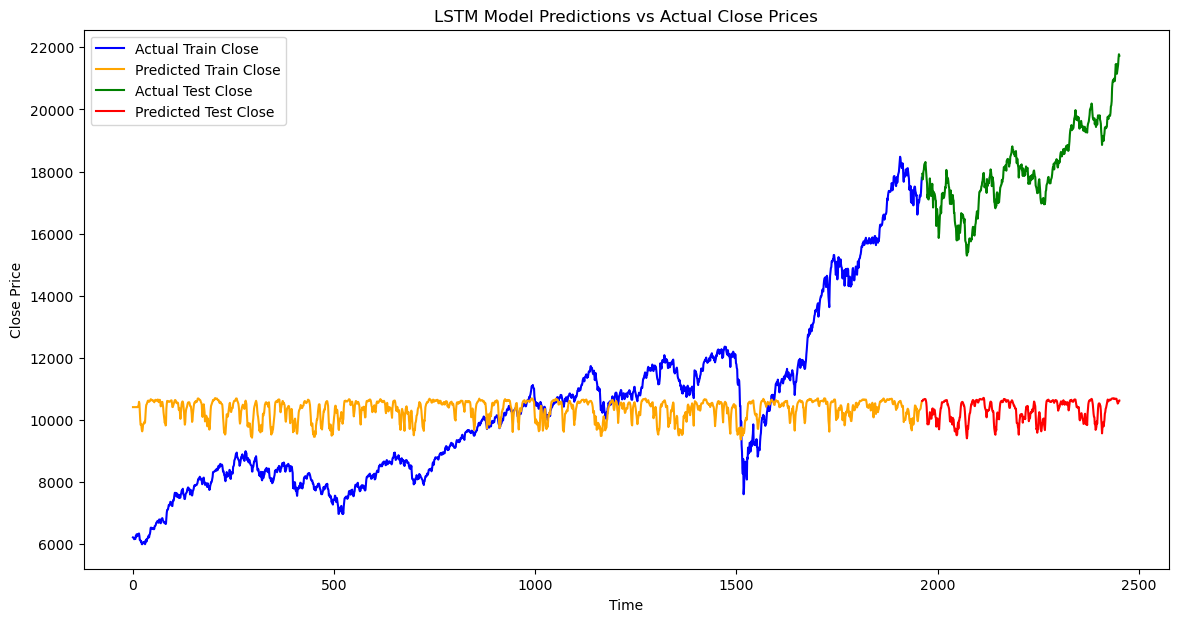

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Specify the features (RSI, %K, %D) and target variable (Close)
feature_columns = ['RSI', '%K', '%D']
target_column = 'Close'

# Prepare the feature and target data
X = data[feature_columns].values  # Select only the specified columns
y = data[target_column].values     # Target variable

# Scale the features and target variable
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

# Reshape for LSTM input shape: [samples, timesteps, features]
timesteps = 1  # Just using the current state; can be adjusted for more history
X_train_reshaped = X_train.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], timesteps, X_test.shape[1]))

# Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate and train the model
model = create_lstm_model()
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=1)

# Predicting using the trained model on both train and test sets
train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

# Inverse transform predictions to get original scale
train_predictions_inverse = scaler_y.inverse_transform(train_predictions)
test_predictions_inverse = scaler_y.inverse_transform(test_predictions)

# Calculate Mean Squared Error
train_mse = mean_squared_error(scaler_y.inverse_transform(y_train.reshape(-1, 1)), train_predictions_inverse)
test_mse = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), test_predictions_inverse)
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[:len(y_train)], scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual Train Close', color='blue')
plt.plot(data.index[:len(y_train)], train_predictions_inverse, label='Predicted Train Close', color='orange')
plt.plot(data.index[len(y_train):len(y_train) + len(y_test)], scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Close', color='green')
plt.plot(data.index[len(y_train):len(y_train) + len(y_test)], test_predictions_inverse, label='Predicted Test Close', color='red')
plt.title('LSTM Model Predictions vs Actual Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [24]:
def create_lstm_model(units=50, dropout_rate=0.3):  # Increased dropout rate
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [26]:
# Function to create the dataset with given timesteps
def create_dataset(X, y, timesteps=1):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:(i + timesteps)])
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

# Set timesteps
timesteps = 5  # Using 5 timesteps for the LSTM

# Create dataset
X_temp, y_temp = create_dataset(X_scaled, y_scaled, timesteps)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=False)

# Now X_train and X_test are already reshaped as required

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0471
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0311
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0295
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0299
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0314
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0309
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0319
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0294
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289
Epoch 16/100
62/

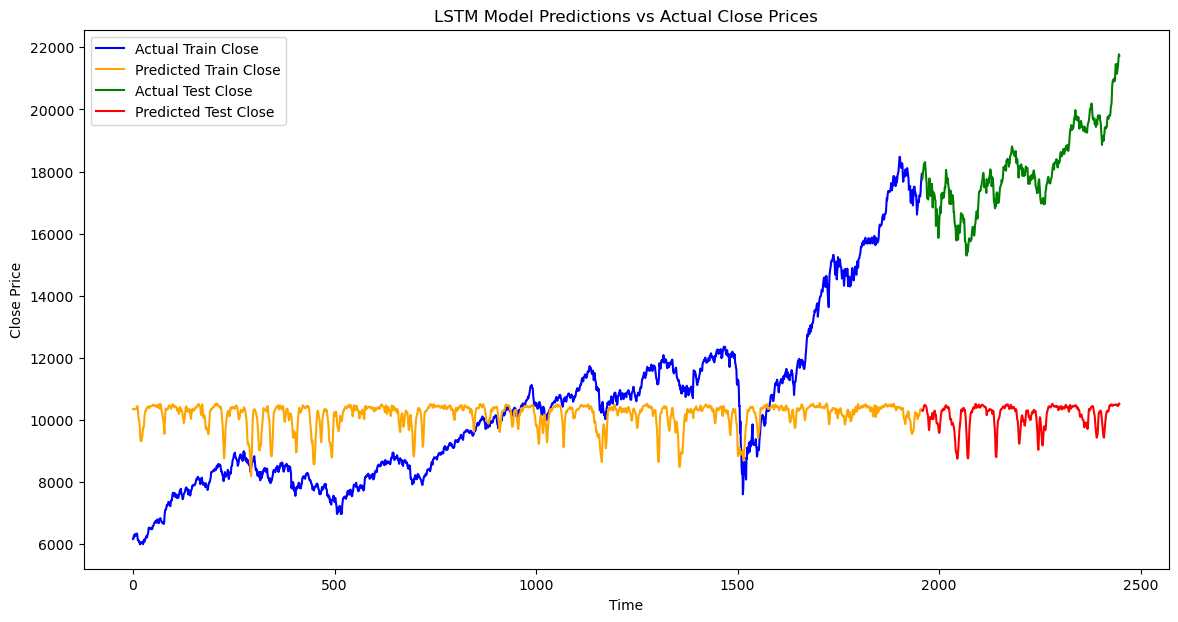

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Specify the features (RSI, %K, %D) and target variable (Close)
feature_columns = ['RSI', '%K', '%D']
target_column = 'Close'

# Prepare the feature and target data
X = data[feature_columns].values
y = data[target_column].values

# Scale the features and target variable
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create dataset with timesteps
timesteps = 5  # Using 5 timesteps
def create_dataset(X, y, timesteps=1):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:(i + timesteps)])
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

X_temp, y_temp = create_dataset(X_scaled, y_scaled, timesteps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=False)

# Create LSTM model
def create_lstm_model(units=50, dropout_rate=0.3):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
model = create_lstm_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predicting using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions
train_predictions_inverse = scaler_y.inverse_transform(train_predictions)
test_predictions_inverse = scaler_y.inverse_transform(test_predictions)

# Calculate Mean Squared Error
train_mse = mean_squared_error(scaler_y.inverse_transform(y_train.reshape(-1, 1)), train_predictions_inverse)
test_mse = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), test_predictions_inverse)
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

# Plotting results
plt.figure(figsize=(14, 7))
plt.plot(data.index[:len(y_train)], scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual Train Close', color='blue')
plt.plot(data.index[:len(y_train)], train_predictions_inverse, label='Predicted Train Close', color='orange')
plt.plot(data.index[len(y_train):len(y_train) + len(y_test)], scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Close', color='green')
plt.plot(data.index[len(y_train):len(y_train) + len(y_test)], test_predictions_inverse, label='Predicted Test Close', color='red')
plt.title('LSTM Model Predictions vs Actual Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_4360\2524726366.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0190 - val_loss: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0017 - val_loss: 5.0150e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0013 - val_loss: 3.6653e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012 - val_loss: 4.1691e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0010 - val_loss: 2.8490e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0011 - val_loss: 3.4653e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.8524e-04 - val_loss: 0.0030
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0010 - val_loss: 8.1293e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.8957e-04 - val_loss: 2.6857e-04
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 8.3594e-04 - val_loss: 3.3639e-04
Epoch 12/50
60/60 ━

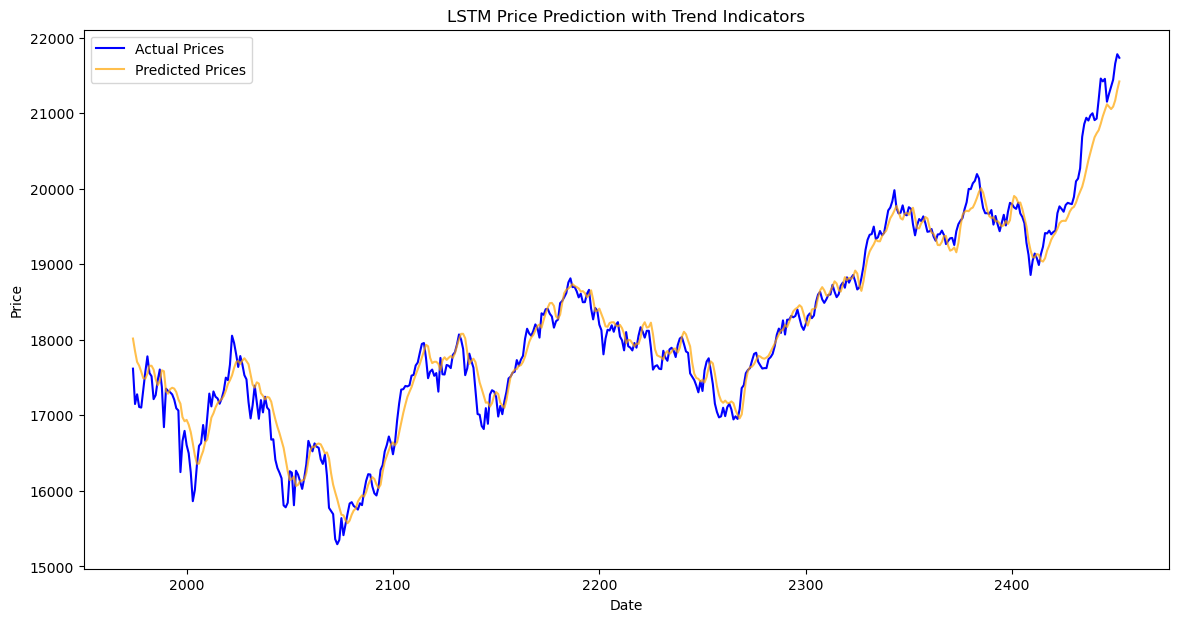

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
# Ensure to adjust the column names based on your actual data
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])  # Use the last 60 days of data
    y.append(scaled_data[i, 3])  # Assuming 'Close' is the 4th column (index 3)

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predicting a single value (next close price)

# Step 8: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Making predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], 6))), axis=1))[:, 0]  # Inverse transform

# Step 11: Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices)
mae = mean_absolute_error(y_test, predicted_prices)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 12: Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Trend Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model for use in GridSearchCV
model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

ModuleNotFoundError: No module named 'keras.wrappers'

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.5.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor  # Use standalone Keras if available

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 3])  # Assuming 'Close' is the 4th column (index 3)

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 8: Wrap the model for use in GridSearchCV
model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Step 9: Define the grid search parameters
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3]
}

# Step 10: Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Step 11: Print best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

ModuleNotFoundError: No module named 'keras.wrappers'

In [17]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor  # Use standalone Keras if available

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 3])  # Assuming 'Close' is the 4th column (index 3)

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 8: Wrap the model for use in GridSearchCV
model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Step 9: Define the grid search parameters
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3]
}

# Step 10: Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Step 11: Print best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

ModuleNotFoundError: No module named 'keras.wrappers'

In [1]:
pip uninstall tensorzflow keras

^C


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Would remove:
    c:\users\prana\anaconda3\lib\site-packages\keras-3.5.0.dist-info\*
    c:\users\prana\anaconda3\lib\site-packages\keras\*
Proceed (Y/n)? 
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tf-nightly

   ---------------------------------------- 0.0/375.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.2 MB 1.3 MB/s eta 0:04:54
   ---------------------------------------- 0.3/375.2 MB 4.6 MB/s eta 0:01:23
   ---------------------------------------- 1.0/375.2 MB 8.9 MB/s eta 0:00:42
   ---------------------------------------- 2.0/375.2 MB 12.7 MB/s eta 0:00:30
   ---------------------------------------- 3.5/375.2 MB 17.2 MB/s eta 0:00:22
    --------------------------------------- 5.3/375.2 MB 22.4 MB/s eta 0:00:17
    --------------------------------------- 7.2/375.2 MB 25.7 MB/s eta 0:00:15
   - -------------------------------------- 9.5/375.2 MB 28.9 MB/s eta 0:00:13
   - -------------------------------------- 11.6/375.2 MB 40.9 MB/s eta 0:00:09
   - -------------------------------------- 14.0/375.2 MB 46.9 MB/s eta 0:00:08
   - -------------------------------------- 16.7/375.2 MB 50.4 MB/s eta 0:00:08
   -- ------------------------------------- 19.5/375.2 MB 54

In [5]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [7]:
# Calculate Bollinger Bands
def bollinger_bands(df, window=20, num_sd=2):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['Upper_Band'] = df['SMA'] + (df['Close'].rolling(window=window).std() * num_sd)
    df['Lower_Band'] = df['SMA'] - (df['Close'].rolling(window=window).std() * num_sd)

# Calculate Average True Range (ATR)
def average_true_range(df, window=14):
    high = df['High']
    low = df['Low']
    close = df['Close']
    tr = pd.concat([high - low, abs(high - close.shift()), abs(low - close.shift())], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(window=window).mean()

# Apply the functions to your DataFrame
bollinger_bands(data)
average_true_range(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)  # Carry forward the next values

# Inspect the updated DataFrame
print(data[['Close', 'SMA', 'Upper_Band', 'Lower_Band', 'ATR']].head())

         Close         SMA   Upper_Band   Lower_Band        ATR
0  6221.149902  6233.39502  6383.112564  6083.677475  69.278599
1  6211.149902  6233.39502  6383.112564  6083.677475  69.278599
2  6191.450195  6233.39502  6383.112564  6083.677475  69.278599
3  6162.250000  6233.39502  6383.112564  6083.677475  69.278599
4  6174.600098  6233.39502  6383.112564  6083.677475  69.278599


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\351983698.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Carry forward the next values


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
features = data[['Close', 'Upper_Band', 'Lower_Band', 'ATR']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 4)
X_test shape: (479, 60, 4)
y_train shape: (1914,)
y_test shape: (479,)


Epoch 1/10


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\796399747.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0152 - val_loss: 9.2767e-04
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016 - val_loss: 8.2547e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0014 - val_loss: 5.9838e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011 - val_loss: 3.3080e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012 - val_loss: 8.6233e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.6982e-04 - val_loss: 4.7030e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.7880e-04 - val_loss: 0.0021
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Squared Error (MSE): 304565872.8875396
Mean Absolute Error (MAE): 17414.80297559810

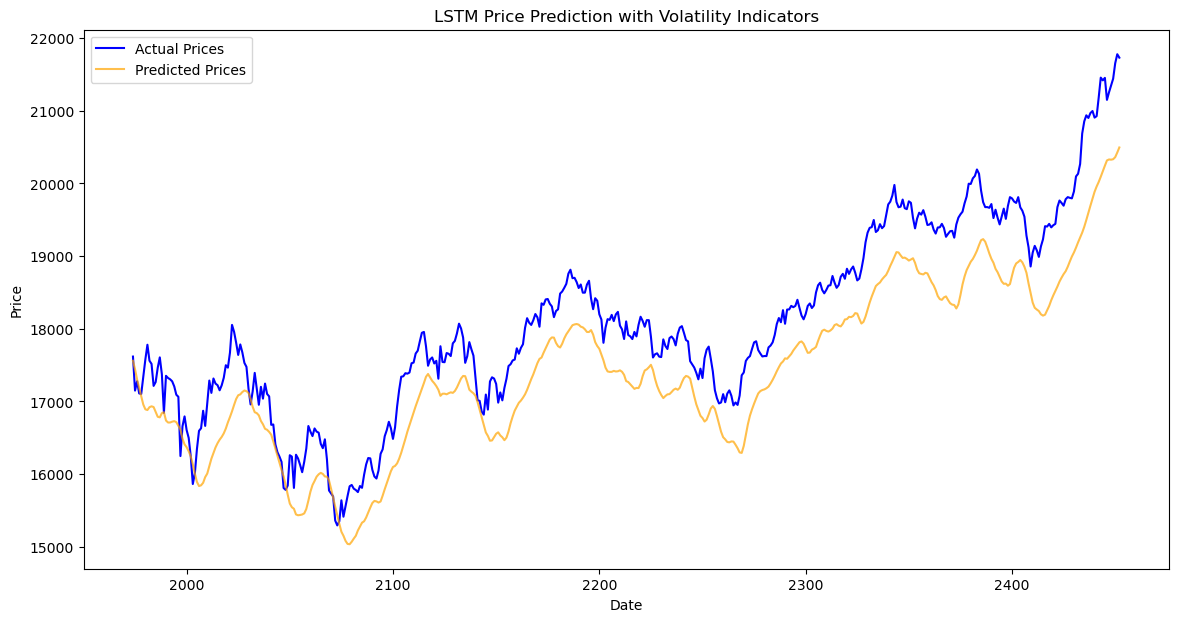

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta  # Importing the pandas_ta library
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 3])  # Assuming 'Close' is the 4th column (index 3)

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')  # Corrected line
    return model

# Step 8: Instantiate and train model directly
model = create_lstm_model()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Making predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))  # Reshape for inverse transform

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 11: Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volatility Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/150


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\1554507988.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0400 - val_loss: 0.0088
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0057 - val_loss: 7.5643e-04
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0034 - val_loss: 9.0930e-04
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0027 - val_loss: 7.6541e-04
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0034 - val_loss: 9.7871e-04
Epoch 9/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0024 - val_loss: 5.6806e-04
Epoch 10/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0022 - val_loss: 8.1266e-04
Epoch 11/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 12/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 

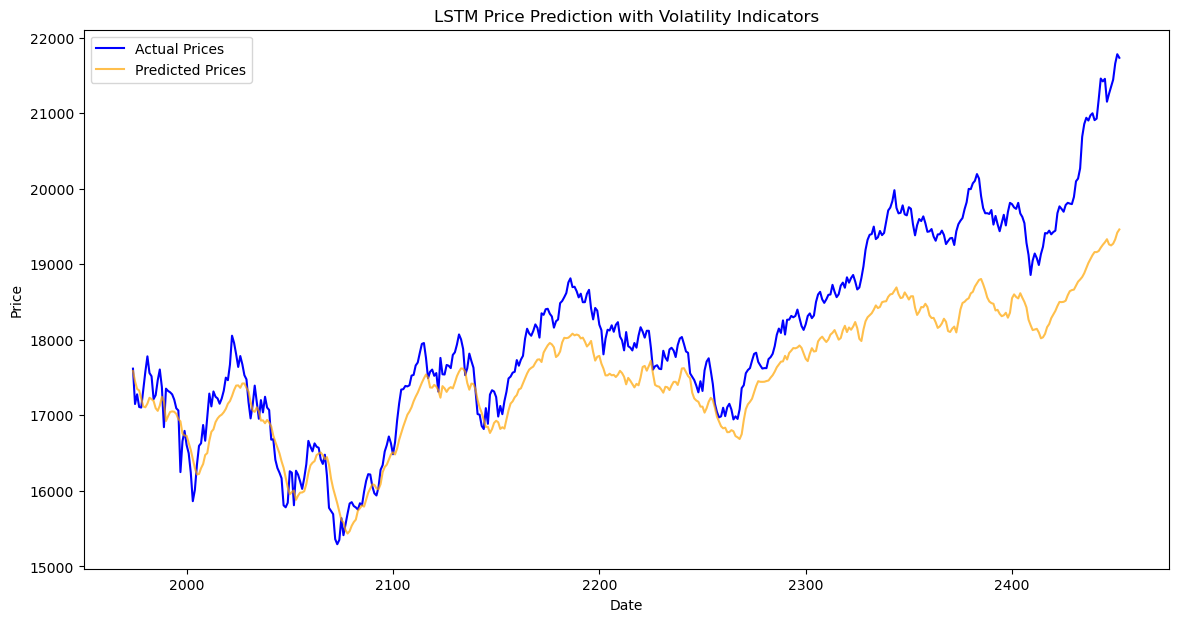

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta  # Importing the pandas_ta library
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 3])  # Assuming 'Close' is the 4th column (index 3)

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.5):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')  # Corrected line
    return model

# Step 8: Instantiate and train model directly
model = create_lstm_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Making predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))  # Reshape for inverse transform

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 11: Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volatility Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/100


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\3794243057.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0349 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0065 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0040 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0036 - val_loss: 5.4420e-04 - learning_rate: 0.0010
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0023 - val_loss: 4.3560e-04 - learning_rate: 0.0010
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021 - val_loss: 3.4521e-04 - learning_rate: 0.0010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0018 - val_loss: 2.8640e-04 - learning_rate: 0.0010
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0016 - val_loss: 7.9321e-04 - learning_rate: 0.0010
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0015 - val_loss: 2.9965e-04 - le

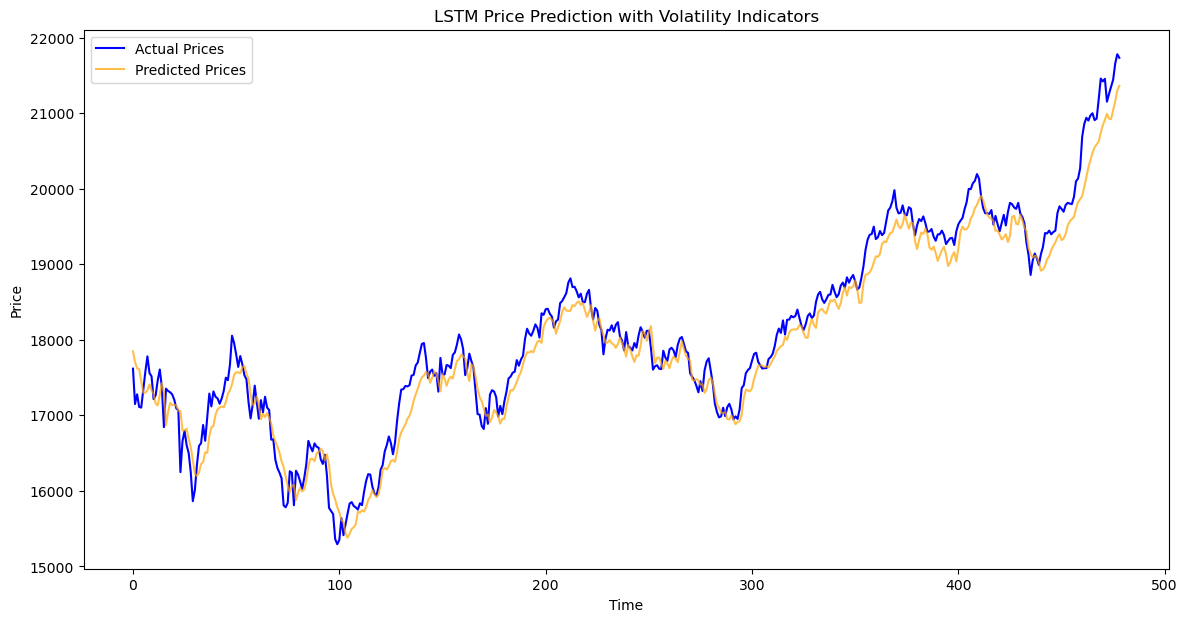

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta  # Importing the pandas_ta library
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D']]

# Step 3: Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 4: Normalize features (Separate scalers for X and y)
scaler_X = MinMaxScaler()
scaled_data = scaler_X.fit_transform(data)

scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(data[['Close']])  # Scaling only the Close price

# Step 5: Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_y[i, 0])  # Corrected to scale 'Close' properly

X, y = np.array(X), np.array(y)

# Step 6: Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Create optimized LSTM model
def create_lstm_model(units=30, dropout_rate=0.3):
    model = Sequential()
    model.add(LSTM(units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))  # One LSTM Layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Add Early Stopping & Reduce Learning Rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Step 8: Train Model
model = create_lstm_model()
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=16, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Step 9: Making predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))  # Fixed inverse transform
actual_prices_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Fix for comparison

# Calculate performance metrics
mse = mean_squared_error(actual_prices_inverse, predicted_prices_inverse)
mae = mean_absolute_error(actual_prices_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 11: Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices_inverse, label='Actual Prices', color='blue')
plt.plot(predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volatility Indicators')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
from sklearn.ensemble import ExtraTreesRegressor

X_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten time series for feature selection
model = ExtraTreesRegressor()
model.fit(X_reshaped, y_train)
feature_importance = model.feature_importances_

# Print feature importance scores
for col, score in zip(data.columns[1:], feature_importance):
    print(f"{col}: {score}")


High: 4.753334824228273e-06
Low: 7.927594568641954e-05
Close: 2.615245963369143e-05
RSI: 5.401245831812731e-05
%K: 1.9564942573517448e-05
%D: 5.5543028288250906e-06


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scaling price-related features
scaler_price = MinMaxScaler()
scaled_price = scaler_price.fit_transform(data[['Close', 'High', 'Low', 'Open', 'Volume']])

# Scaling technical indicators
scaler_indicators = StandardScaler()
scaled_indicators = scaler_indicators.fit_transform(data[['RSI', '%K', '%D', 'MACD Line', 'Signal Line', 'MACD Histogram']])

# Combine the scaled price and indicators
scaled_data = np.hstack([scaled_price, scaled_indicators])


In [35]:
X, y = [], []
days_back = 60  # Lookback period for LSTM

# Creating data windows
for i in range(days_back, len(scaled_data)):
    X.append(scaled_data[i-days_back:i])
    y.append(scaled_data[i, 0])  # Use the 'Close' value for prediction (index 0 after scaling)

X, y = np.array(X), np.array(y)


In [37]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

def create_lstm_model(units=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(units // 2)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))  # Extra Dense Layer
    model.add(Dense(1))  # Output layer for price prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [67]:
# Adjusting ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Keep EarlyStopping as it is
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Continue training with these updated callbacks
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.8157e-04 - val_loss: 0.0047 - learning_rate: 4.0000e-05
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.1974e-04 - val_loss: 0.0059 - learning_rate: 4.0000e-05
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.4982e-04 - val_loss: 0.0041 - learning_rate: 4.0000e-05
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.6380e-04 - val_loss: 0.0046 - learning_rate: 4.0000e-05
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 3.4977e-04 - val_loss: 0.0046 - learning_rate: 4.0000e-05
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.8669e-04 - val_loss: 0.0045 - learning_rate: 4.0000e-05
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.1799e-04 - val_loss: 0.0047 - learning_rate: 4.0000e-05
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.8719e-04 - val_loss: 0.0043 - learning_rate: 4.0000e-05


In [71]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [73]:
# Calculate Bollinger Bands
def bollinger_bands(df, window=20, num_sd=2):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['Upper_Band'] = df['SMA'] + (df['Close'].rolling(window=window).std() * num_sd)
    df['Lower_Band'] = df['SMA'] - (df['Close'].rolling(window=window).std() * num_sd)

# Calculate Average True Range (ATR)
def average_true_range(df, window=14):
    high = df['High']
    low = df['Low']
    close = df['Close']
    tr = pd.concat([high - low, abs(high - close.shift()), abs(low - close.shift())], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(window=window).mean()  # ATR

# Apply the functions to your DataFrame
bollinger_bands(data)
average_true_range(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)  # Carry forward the next values

# Inspect the updated DataFrame
print(data[['Close', 'Upper_Band', 'Lower_Band', 'ATR']].head())

         Close   Upper_Band   Lower_Band        ATR
0  6221.149902  6383.112564  6083.677475  69.278599
1  6211.149902  6383.112564  6083.677475  69.278599
2  6191.450195  6383.112564  6083.677475  69.278599
3  6162.250000  6383.112564  6083.677475  69.278599
4  6174.600098  6383.112564  6083.677475  69.278599


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\149105091.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Carry forward the next values


In [79]:
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
features = data[['Upper_Band', 'Lower_Band', 'ATR']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 3)
X_test shape: (479, 60, 3)
y_train shape: (1914,)
y_test shape: (479,)


Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0300 - val_loss: 0.0022
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0

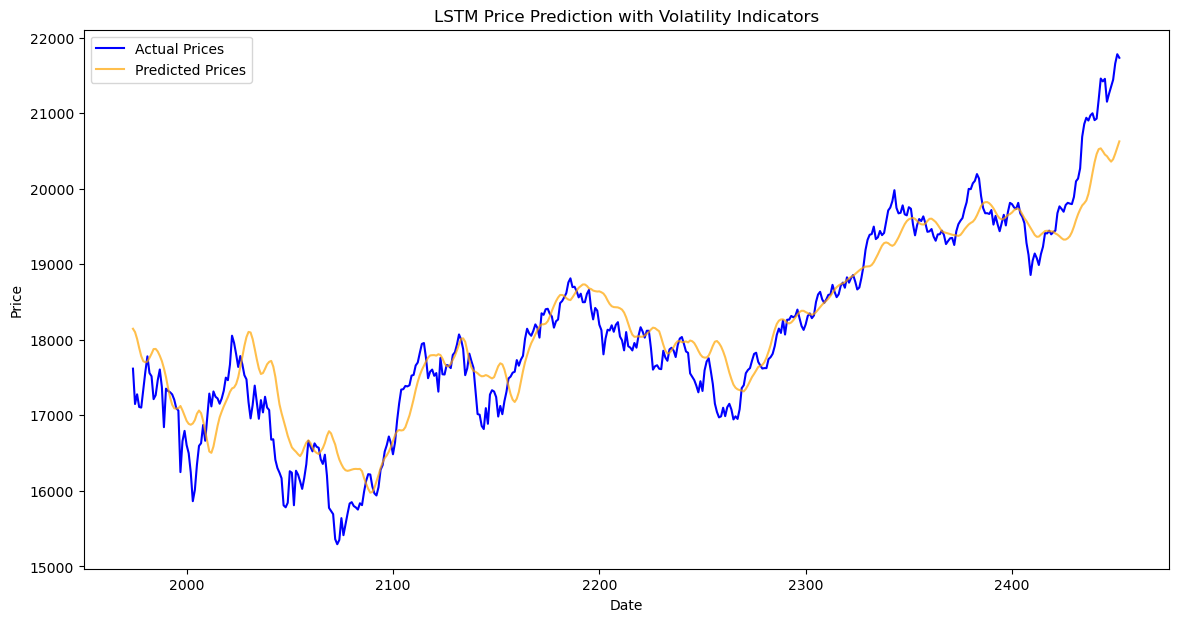

In [83]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate and train model directly
model = create_lstm_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 6: Making predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Step 7: Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volatility Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [89]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   ------------------- -------------------- 61.4/129.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [90]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [93]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,
    directory='my_dir',  # Directory to save the results
    project_name='lstm_tuning'
)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32, 
             validation_data=(X_test, y_test))

Trial 10 Complete [00h 01m 44s]
val_loss: 0.0007654601358808577

Best val_loss So Far: 0.0005598688730970025
Total elapsed time: 00h 47m 06s


In [97]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss = best_model.evaluate(X_test, y_test)
print("Best model loss:", loss)

# Optionally, you can also print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("Units:", best_hyperparameters.get('units'))
print("Dropout Rate:", best_hyperparameters.get('dropout_rate'))

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.0773e-04
Best model loss: 0.0005598688730970025
Best Hyperparameters:
Units: 128
Dropout Rate: 0.1


In [99]:
import pandas as pd
import numpy as np
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess your data (as done previously)
# ...

# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Set up the tuner
tuner

In [101]:
# Train the best model on the entire training dataset
best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 6.0248e-04 - val_loss: 0.0018
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.2357e-04 - val_loss: 5.8285e-04
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.7817e-04 - val_loss: 5.7452e-04
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.8898e-04 - val_loss: 6.6205e-04
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 4.1744e-04 - val_loss: 0.0010
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 4.0325e-04 - val_loss: 7.3726e-04
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 3.6083e-04 - val_loss: 5.8655e-04
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.0253e-04 - val_loss: 0.0011
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.9051e-04 - val_loss: 5.8839e-04
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.3025e-04 - val_loss: 0.0021
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.8497e-04 - v

In [102]:
# Evaluate the best model
loss = best_model.evaluate(X_test, y_test)
print("Final model loss:", loss)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.3069e-04
Final model loss: 0.0005512800998985767


In [103]:
# Make predictions
predicted_prices = best_model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


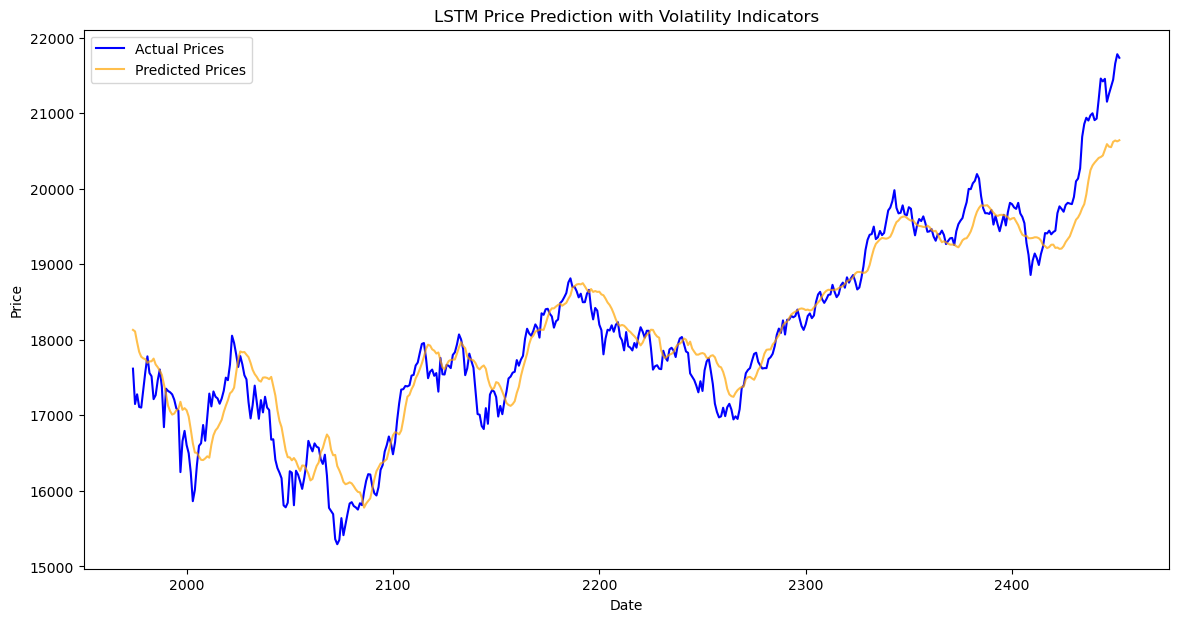

In [104]:
import matplotlib.pyplot as plt

# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + days_back:], data['Close'].values[train_size + days_back:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size + days_back:], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volatility Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [105]:
# Save the model
best_model.save('best_hypertune_Ke_baad_lstm_model.h5')

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Make predictions
predicted_prices = best_model.predict(X_test)

# Step 2: Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Step 3: Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices_inverse)

# Step 4: Display results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Mean Squared Error (MSE): 328675245.7658751
Mean Absolute Error (MAE): 18095.40839337929
Root Mean Squared Error (RMSE): 18129.402796724306
R-squared (R2): -48430332509.17628


In [113]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [115]:
# Calculate On-Balance Volume (OBV)
def calculate_obv(df):
    obv = [0]  # Start with zero
    for i in range(1, len(df)):
        if df['Close'].iloc[i] > df['Close'].iloc[i - 1]:
            obv.append(obv[-1] + df['Volume'].iloc[i])
        elif df['Close'].iloc[i] < df['Close'].iloc[i - 1]:
            obv.append(obv[-1] - df['Volume'].iloc[i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv

# Calculate Chaikin Oscillator
def calculate_chaikin(df, short_window=3, long_window=10):
    df['AD'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low']) * df['Volume']
    df['Chaikin'] = df['AD'].rolling(window=short_window).sum() - df['AD'].rolling(window=long_window).sum()

# Apply the functions to your DataFrame
calculate_obv(data)
calculate_chaikin(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)  # Carry forward the next values

# Inspect the updated DataFrame
print(data[['Close', 'OBV', 'Chaikin']].head())

         Close       OBV        Chaikin
0  6221.149902       0.0  228681.472272
1  6211.149902 -139000.0  228681.472272
2  6191.450195 -257300.0  228681.472272
3  6162.250000 -395900.0  228681.472272
4  6174.600098 -249000.0  228681.472272


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\1189892720.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Carry forward the next values


In [117]:
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
features = data[['Close', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training/testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1914, 60, 3)
X_test shape: (479, 60, 3)
y_train shape: (1914,)
y_test shape: (479,)


In [119]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and target variable
features = data[['Close', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 3)
X_val shape: (239, 60, 3)
X_test shape: (240, 60, 3)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


In [121]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create LSTM model function
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate the model
model = create_lstm_model(units=128, dropout_rate=0.1)  # Using the best hyperparameters from previous tuning

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0200 - val_loss: 0.0013
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.0760e-04 - val_loss: 8.2573e-04
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 6.9642e-04 - val_loss: 7.6926e-04
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 5.8587e-04 - val_loss: 0.0012
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 4.9336e-04 - val_loss: 8.6055e-04
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.4828e-04 - val_loss: 0.0012
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 6.3055e-04 - val_loss: 6.3272e-04
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 4.5874e-04 - val_loss: 0.0010
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 4.2931e-04 - val_loss: 5.7623e-04
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 4.1990e-04 - val_loss: 7.3974e-04
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 3.7426e-04 - val_loss: 7.5258e

In [123]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0049e-04
Test Loss: 0.0003808932669926435


In [125]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 348766812.63074774
Mean Absolute Error (MAE): 18646.113879951652
Root Mean Squared Error (RMSE): 18675.299532557645
R-squared (R2): -70288469799.2806


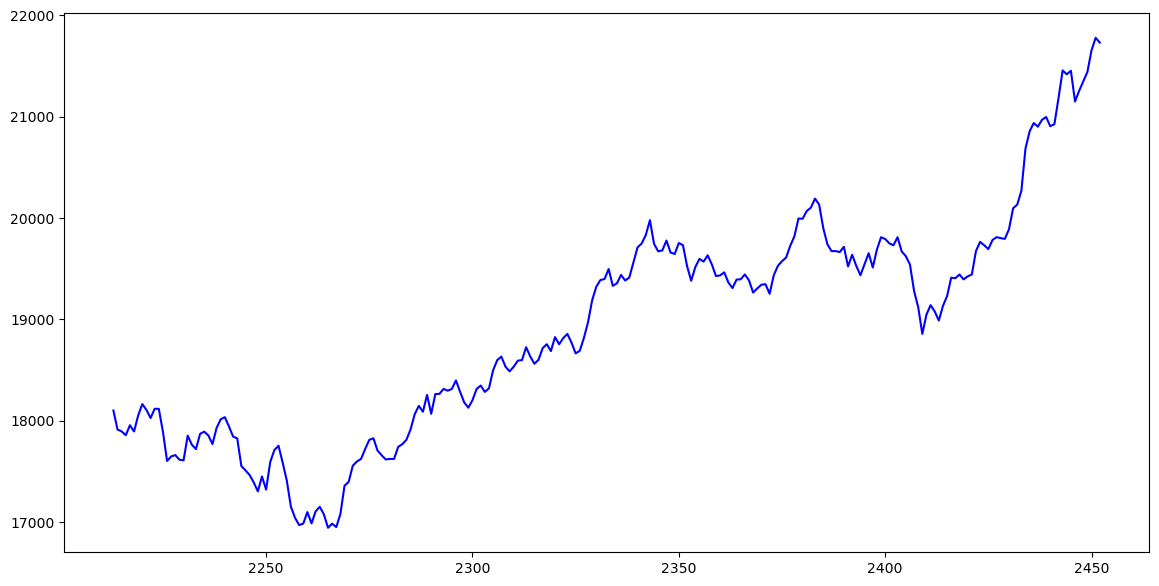

In [135]:
import matplotlib.pyplot as plt

# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], data['Close'].values[len(data) - len(y_test):], label='Actual Prices', color='blue')

NameError: name 'y_test_inverse' is not defined

<Figure size 1400x700 with 0 Axes>

In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Calculate OBV and Chaikin (as done previously)
# ...

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Prepare the dataset for LSTM
features = data[['Close', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 3)
X_val shape: (239, 60, 3)
X_test shape: (240, 60, 3)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\755361842.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [139]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

def create_lstm_model():
    model = Sequential()
    
    # Input Layer and First LSTM Layer
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Second LSTM Layer
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Third LSTM Layer
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Instantiate the model
model = create_lstm_model()

# Print the model summary
model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 128)             │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,337 (509.13 KB)

 Trainable params: 129,889 (507.38 KB)

 Non-trainable params: 448 (1.75 KB)

In [141]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - loss: 0.8401 - val_loss: 0.1884
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.3940 - val_loss: 0.1440
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.2695 - val_loss: 0.1316
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.2247 - val_loss: 0.1174
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.1619 - val_loss: 0.0363
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.1456 - val_loss: 0.0521
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.1016 - val_loss: 0.0590
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0931 - val_loss: 0.0189
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0661 - val_loss: 0.0200
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0554 - val_loss: 0.0144
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0439 - val_loss: 0.0036
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/ste

In [142]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0035
Test Loss: 0.004790639970451593


In [143]:
# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test_inverse, predicted_prices_inverse)
mae = mean_absolute_error(y_test_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 94819.28642530441
Mean Absolute Error (MAE): 276.4736653645833
Root Mean Squared Error (RMSE): 307.9274044727172
R-squared (R2): 0.9232368543222532


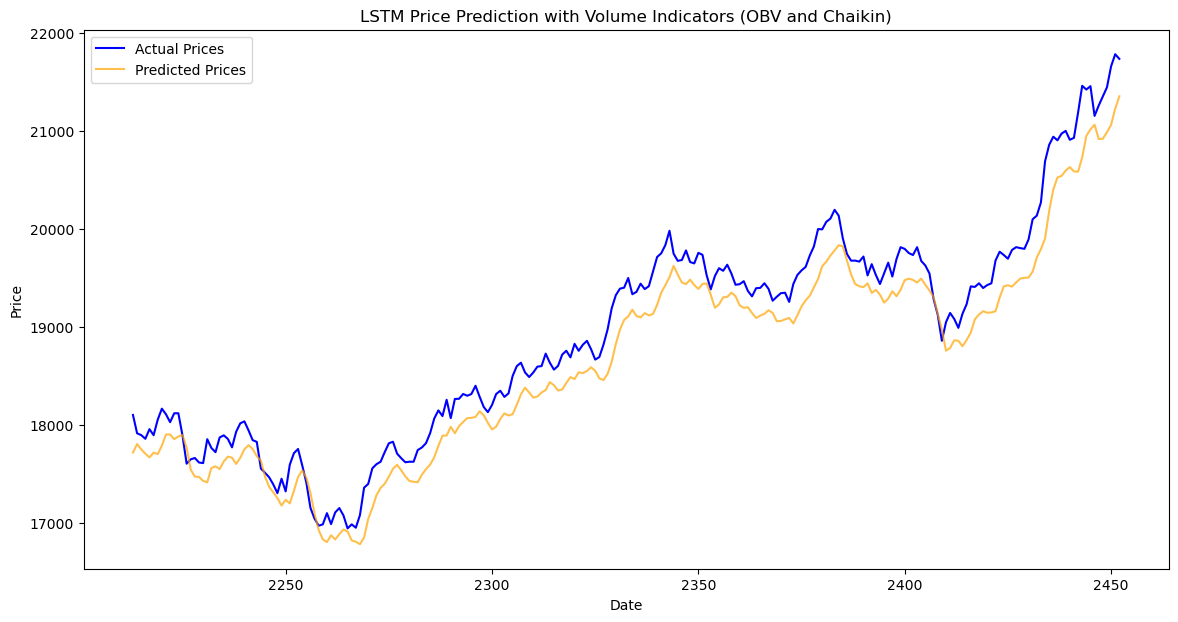

In [145]:
import matplotlib.pyplot as plt

# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(y_test):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with Volume Indicators (OBV and Chaikin)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

after using all the indicator now will be adding all of them in one 

In [152]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [154]:
# Example functions to calculate indicators if not already present in the DataFrame

# Moving Averages
def calculate_moving_averages(df, window=20):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()

# MACD
def calculate_macd(df):
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD Line'] = df['EMA_12'] - df['EMA_26']
    df['Signal Line'] = df['MACD Line'].ewm(span=9, adjust=False).mean()
    df['MACD Histogram'] = df['MACD Line'] - df['Signal Line']

# RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

# Stochastic Oscillator
def calculate_stochastic(df, k_window=14, d_window=3):
    df['%K'] = (df['Close'] - df['Low'].rolling(window=k_window).min()) / (df['High'].rolling(window=k_window).max() - df['Low'].rolling(window=k_window).min()) * 100
    df['%D'] = df['%K'].rolling(window=d_window).mean()

# Bollinger Bands and ATR (as previously defined)
# ...

# Apply the functions to your DataFrame
calculate_moving_averages(data)
calculate_macd(data)
calculate_rsi(data)
calculate_stochastic(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Inspect the updated DataFrame
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band  ...         ATR       OBV  \
0  61.487913  79.652465  89.938839  12283.947469  ...  146.587751       0.0   
1  61.487913  79.652465  89.938839  12283.947469  ...  146.587751 -139000.0   
2  61.487913  79.652465  89.938839  12283.947469  ...  146.587751 -257300.0   
3  61.487913  79.652465  89.938839  12283.947469  ...  146.587751 -395900.0   
4  61.487913  79.652465  89.938839  12283.947469  ...  146.587751 -249000.0   

        Chaikin         SMA          EMA  MACD Lin

C:\Users\prana\AppData\Local\Temp\ipykernel_23880\3994452660.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [160]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and target variable
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10%

# Split into training, validation, and testing sets
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 14)
X_val shape: (239, 60, 14)
X_test shape: (240, 60, 14)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


In [162]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Create LSTM model function
def create_lstm_model():
    model = Sequential()
    
    # Input Layer and First LSTM Layer
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Second LSTM Layer
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Third LSTM Layer
    model.add(LSTM(32))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Instantiate the model
model = create_lstm_model()

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 60, 128)             │          73,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,969 (531.13 KB)

 Trainable params: 135,521 (529.38 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - loss: 0.7229 - val_loss: 0.3225
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.1946 - val_loss: 0.2541
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.1425 - val_loss: 0.1767
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.1021 - val_loss: 0.1010
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0970 - val_loss: 0.1042
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0757 - val_loss: 0.0594
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0647 - val_loss: 0.0199
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0567 - val_loss: 0.0244
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0532 - val_loss: 0.0052
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0394 - val_loss: 0.0109
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0331 - val_loss: 0.0043
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/ste

In [163]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0034
Test Loss: 0.005654298700392246


In [164]:
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, predicted_prices_inverse)
mae = mean_absolute_error(y_test, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 345421341.74616224
Mean Absolute Error (MAE): 18583.62187962613
Root Mean Squared Error (RMSE): 18585.514298672562
R-squared (R2): -69614242720.548


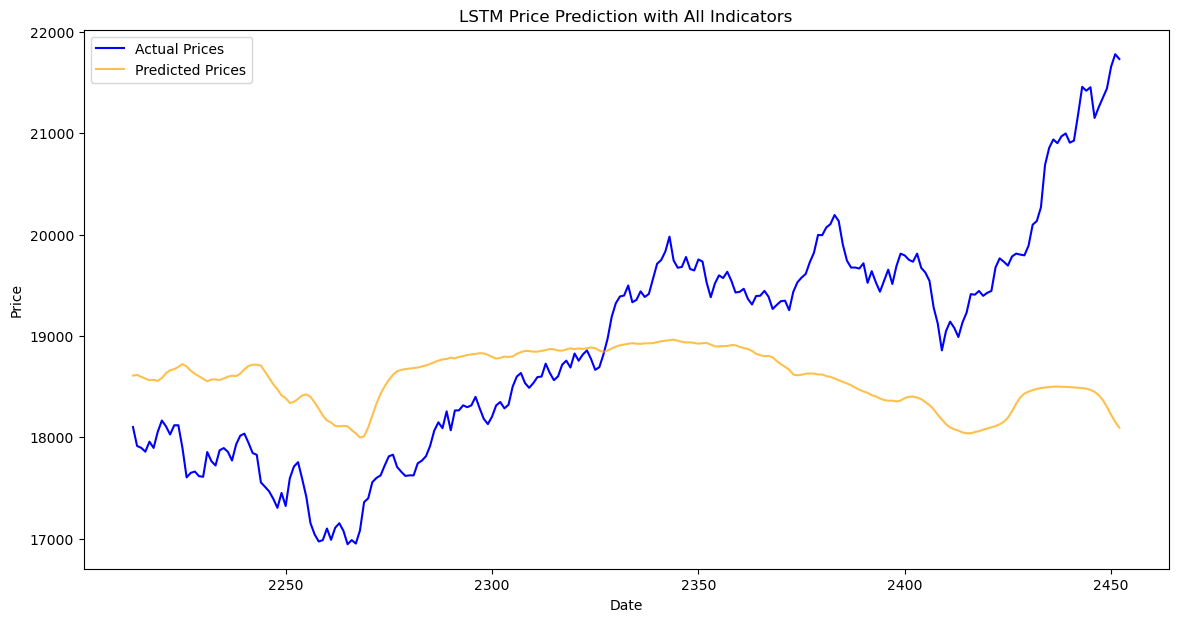

In [166]:
# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with All Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

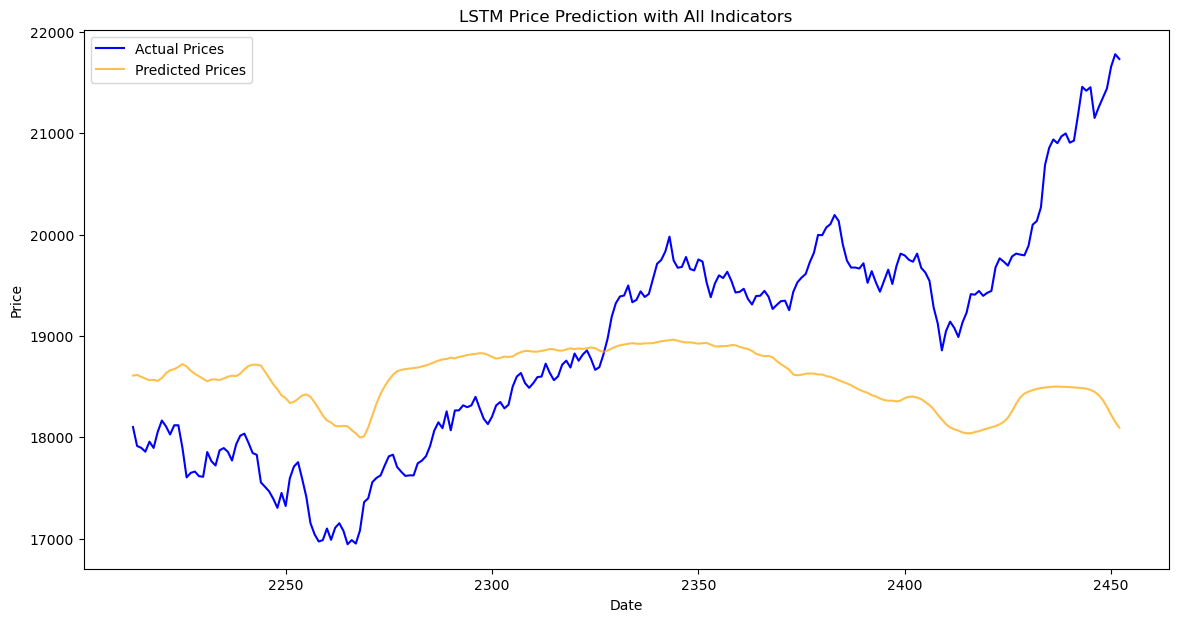

In [176]:
import pandas as pd
import numpy as np
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping  # Import EarlyStopping from keras

# Load the data from the CSV file
data = pd.read_csv('eros_indicators.csv')

# Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']]

# Handle NaN values by backfill
data.bfill(inplace=True)  # Use backfill to handle NaN values

# Prepare the dataset for LSTM
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Input Layer and First LSTM Layer
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
        # Second LSTM Layer
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,  # Increase the number of trials for a more extensive search
    executions_per_trial=1,
    directory='my_dir',  # Directory to save the results
    project_name='lstm_tuning'
)

# Run the tuner
tuner.search(X_train, y_train, 
             epochs=100, 
             batch_size=32, 
             validation_data=(X_val, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=10)])  # Use EarlyStopping from keras

# Step 4: Evaluate the Best Model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss = best_model.evaluate(X_test, y_test)
print("Best model loss:", loss)

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("Units:", best_hyperparameters.get('units'))
print("Dropout Rate:", best_hyperparameters.get('dropout_rate'))

# Optionally, you can save the best model
best_model.save('best_lstm_model.h5')

Trial 38 Complete [00h 02m 13s]
val_loss: 0.0010124125983566046

Best val_loss So Far: 0.0004058391787111759
Total elapsed time: 03h 23m 14s


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 4.3629e-04


Best model loss: 0.00046915965504013
Best Hyperparameters:
Units: 224
Dropout Rate: 0.1


In [178]:
import pandas as pd
import numpy as np
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Step 1: Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Step 2: Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']]

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Step 3: Prepare the dataset for LSTM
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

# Step 4: Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Input Layer and First LSTM Layer
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
    # Second LSTM Layer
    model.add(LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Step 5: Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,  # Increase the number of trials for a more extensive search
    executions_per_trial=1,
    directory='my_dir',  # Directory to save the results
    project_name='lstm_tuning'
)

# Step 6: Run the tuner
tuner.search(X_train, y_train, 
             epochs=100, 
             batch_size=32, 
             validation_data=(X_val, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=10)])  # Use EarlyStopping from keras

# Step 7: Evaluate the Best Model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss = best_model.evaluate(X_test, y_test)
print("Best model loss:", loss)

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("Units:", best_hyperparameters.get('units'))
print("Dropout Rate:", best_hyperparameters.get('dropout_rate'))

# Optionally, you can save the best model
best_model.save('best_lstm_model.h5')

C:\Users\prana\AppData\Local\Temp\ipykernel_23880\186861105.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


X_train shape: (1914, 60, 14)
X_val shape: (239, 60, 14)
X_test shape: (240, 60, 14)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)
Reloading Tuner from my_dir\lstm_tuning\tuner0.json


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\prana\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 4.3629e-04


Best model loss: 0.00046915965504013
Best Hyperparameters:
Units: 224
Dropout Rate: 0.1


In [180]:
# Make predictions on the test set
predicted_prices = best_model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test_inverse, predicted_prices_inverse)
mae = mean_absolute_error(y_test_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 116792.13109032314
Mean Absolute Error (MAE): 283.51819661458336
Root Mean Squared Error (RMSE): 341.748637291099
R-squared (R2): 0.9054482298813378


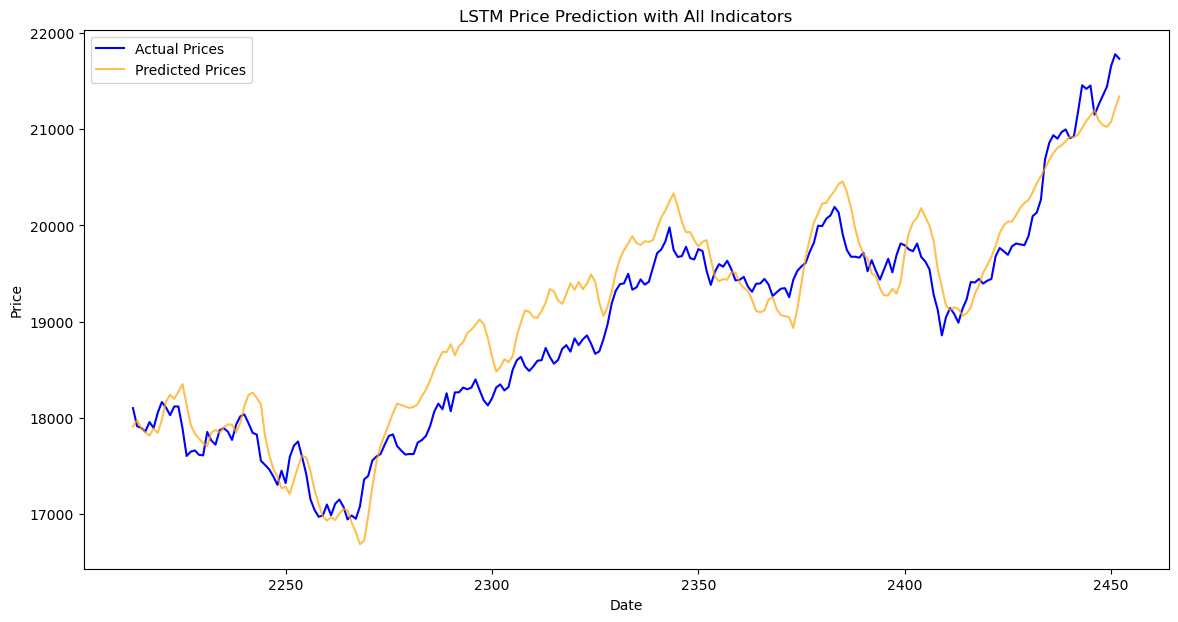

In [184]:
# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('LSTM Price Prediction with All Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [188]:
# Save the best model
best_model.save('best_lstm_model_allfeature.h5')

Start with gru

In [191]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [193]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']]

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Prepare the dataset for GRU
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for GRU (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 14)
X_val shape: (239, 60, 14)
X_test shape: (240, 60, 14)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


C:\Users\prana\AppData\Local\Temp\ipykernel_23880\3867827273.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [195]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization

def create_gru_model():
    model = Sequential()
    
    # Input Layer and First GRU Layer
    model.add(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Second GRU Layer
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Third GRU Layer
    model.add(GRU(32))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

#

In [197]:
# Create the GRU model
gru_model = create_gru_model()

# Train the model
history = gru_model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=32, 
                        validation_data=(X_val, y_val),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)])  # Early stopping to prevent overfitting

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - loss: 0.6145 - val_loss: 0.0684
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.2071 - val_loss: 0.1953
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.1682 - val_loss: 0.1066
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.1269 - val_loss: 0.1017
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.1119 - val_loss: 0.0622
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.1043 - val_loss: 0.0314
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0901 - val_loss: 0.0191
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0680 - val_loss: 0.0056
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0596 - val_loss: 0.0067
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0466 - val_loss: 0.0041
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0414 - val_loss: 0.0079
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/ste

In [199]:
# Evaluate the model on the test set
loss = gru_model.evaluate(X_test, y_test)
print("GRU model loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078
GRU model loss: 0.015114014968276024


In [201]:
# Make predictions
predicted_prices = gru_model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test_inverse, predicted_prices_inverse)
mae = mean_absolute_error(y_test_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3762465.644528103
Mean Absolute Error (MAE): 1683.2568033854166
Root Mean Squared Error (RMSE): 1939.707618309549
R-squared (R2): -2.045991055901377


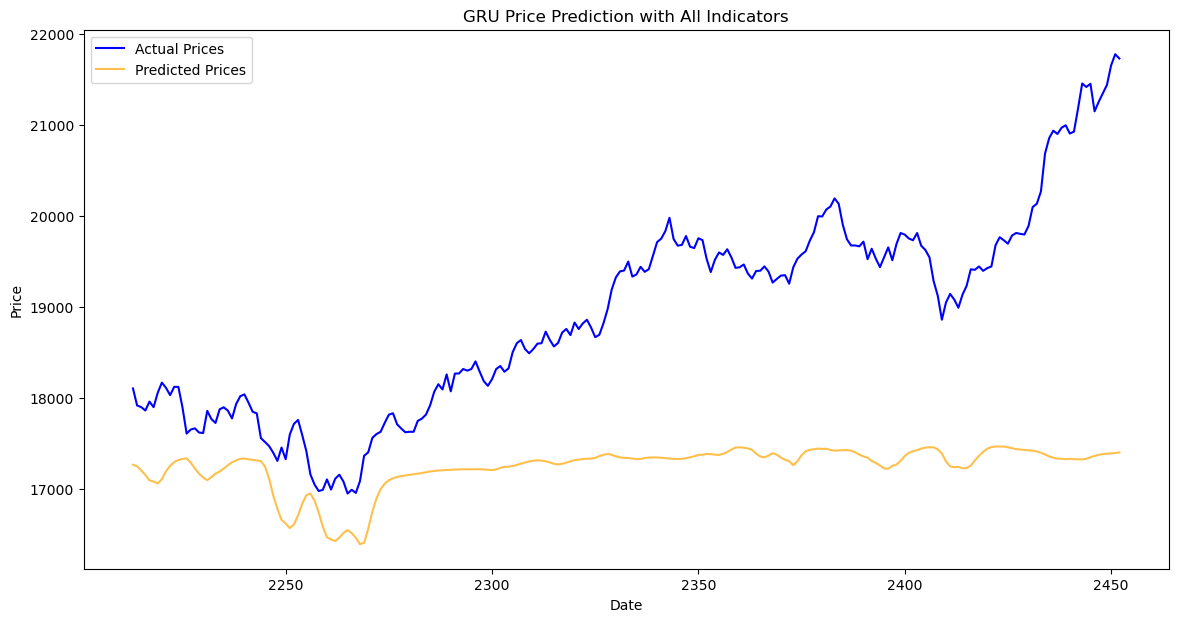

In [205]:
import matplotlib.pyplot as plt

# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('GRU Price Prediction with All Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [207]:
# Save the GRU model
gru_model.save('1st_gru_model.h5')

In [8]:
import pandas as pd
import numpy as np
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Select relevant columns (OHLC and indicators)
data = data[['Open', 'High', 'Low', 'Close', 'RSI', '%K', '%D', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']]

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Prepare the dataset for LSTM
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram', 'RSI', '%K', '%D', 'Upper Band', 'Lower Band', 'ATR', 'OBV', 'Chaikin']].values
target_column = 'Close'
y = data[target_column].values

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for LSTM (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

# Step 4: Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Input Layer and First GRU Layer
    model.add(GRU(units=hp.Int('units', min_value=64, max_value=256, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
    # Second GRU Layer
    model.add(GRU(units=hp.Int('units', min_value=64, max_value=256, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Step 5: Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,  # Increase the number of trials for a more extensive search
    executions_per_trial=1,
    directory='my_dir',  # Directory to save the results
    project_name='gru_tuning'
)


X_train shape: (1914, 60, 14)
X_val shape: (239, 60, 14)
X_test shape: (240, 60, 14)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)
Reloading Tuner from my_dir\gru_tuning\tuner0.json


C:\Users\prana\AppData\Local\Temp\ipykernel_1860\3805485799.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [10]:
# Step 6: Run the tuner
tuner.search(X_train, y_train, 
             epochs=100, 
             batch_size=32, 
             validation_data=(X_val, y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=10)])  # Early stopping to prevent overfitting

Trial 33 Complete [00h 03m 22s]
val_loss: 0.0011251476826146245

Best val_loss So Far: 0.00037363485898822546
Total elapsed time: 11h 52m 56s


In [11]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss = best_model.evaluate(X_test, y_test)
print("Best GRU model loss:", loss)

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("Units:", best_hyperparameters.get('units'))
print("Dropout Rate:", best_hyperparameters.get('dropout_rate'))

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0013  
Best GRU model loss: 0.00328778731636703
Best Hyperparameters:
Units: 256
Dropout Rate: 0.1


In [12]:
# Make predictions
predicted_prices = best_model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test_inverse, predicted_prices_inverse)
mae = mean_absolute_error(y_test_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 818458.0903016726
Mean Absolute Error (MAE): 679.2112630208334
Root Mean Squared Error (RMSE): 904.686736004056
R-squared (R2): 0.33739832912103673


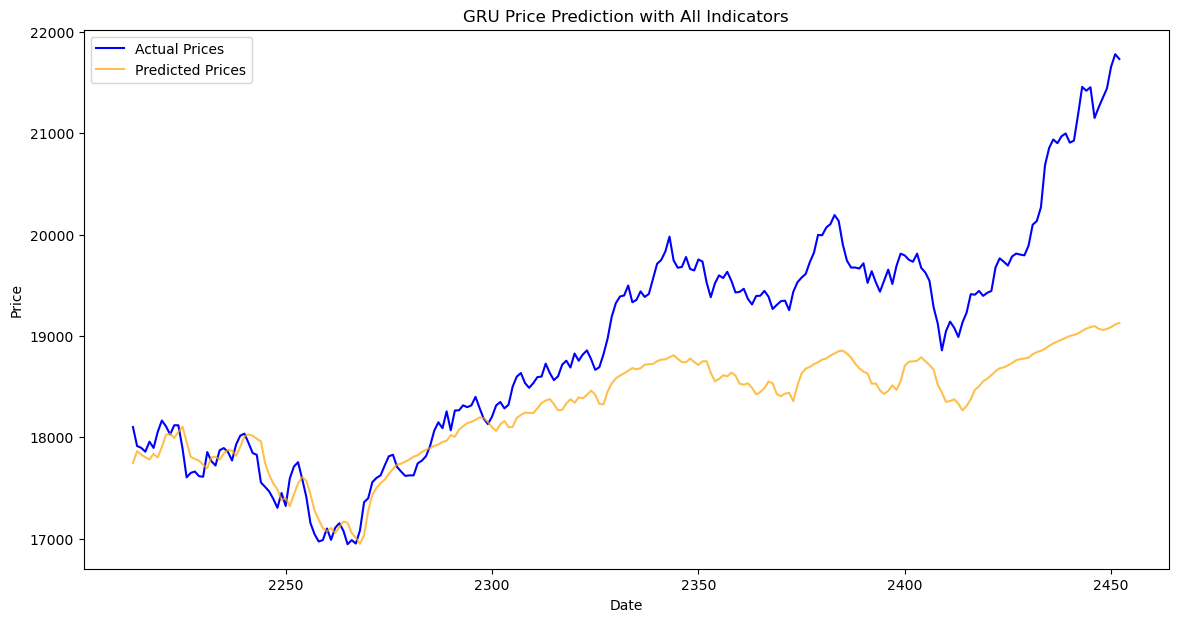

In [14]:
# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('GRU Price Prediction with All Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
# Save the GRU model
best_model.save('2nd_gru_model_allfeature.h5')

In [22]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [24]:
# Calculate Simple Moving Average (SMA)
def calculate_sma(df, window=30):
    df['SMA'] = df['Close'].rolling(window=window).mean()

# Calculate Exponential Moving Average (EMA)
def calculate_ema(df, window=30):
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()

# Calculate MACD
def calculate_macd(df):
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD Line'] = df['EMA_12'] - df['EMA_26']
    df['Signal Line'] = df['MACD Line'].ewm(span=9, adjust=False).mean()
    df['MACD Histogram'] = df['MACD Line'] - df['Signal Line']

# Apply the functions to your DataFrame
calculate_sma(data)
calculate_ema(data)
calculate_macd(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Inspect the updated DataFrame
print(data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram']].head())

         Close          SMA          EMA  MACD Line  Signal Line  \
0  6221.149902  6171.861686  6221.149902   0.000000     0.000000   
1  6211.149902  6171.861686  6220.504741  -0.797721    -0.159544   
2  6191.450195  6171.861686  6218.630254  -2.985111    -0.724658   
3  6162.250000  6171.861686  6214.992818  -6.994221    -1.978570   
4  6174.600098  6171.861686  6212.386836  -9.070362    -3.396929   

   MACD Histogram  
0        0.000000  
1       -0.638177  
2       -2.260454  
3       -5.015651  
4       -5.673433  


C:\Users\prana\AppData\Local\Temp\ipykernel_1860\2848910775.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and target variable
features = data[['Close', 'SMA', 'EMA', 'MACD Line', 'Signal Line', 'MACD Histogram']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for GRU (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 6)
X_val shape: (239, 60, 6)
X_test shape: (240, 60, 6)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization

def create_gru_model():
    model = Sequential()
    
    # Input Layer and First GRU Layer
    model.add(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Second GRU Layer
    model.add(GRU(64, return_sequences=True))  # Stacked GRU layer
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Third GRU Layer
    model.add(GRU(32))  # Last GRU layer
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Instantiate the GRU model
gru_model = create_gru_model()

# Print the model summary
gru_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 128)             │          52,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 60, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,809 (389.88 KB)

 Trainable params: 99,361 (388.13 KB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_gru_model(units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        GRU(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout_rate),
        GRU(units),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting one value (Close price)
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model


In [36]:
from sklearn.model_selection import ParameterGrid

# Define parameter grid
param_grid = {
    "units": [32, 64, 128],          # Number of GRU units
    "dropout_rate": [0.2, 0.3],      # Dropout rates
    "learning_rate": [0.001, 0.0005] # Learning rates
}

best_model = None
best_loss = float("inf")

# Try different combinations of hyperparameters
for params in ParameterGrid(param_grid):
    print(f"Training with: {params}")
    
    model = create_gru_model(**params)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
                        verbose=0)  # Silent training
    
    # Get final validation loss
    final_val_loss = min(history.history['val_loss'])
    
    if final_val_loss < best_loss:
        best_loss = final_val_loss
        best_model = model
        best_params = params

print(f"Best Params: {best_params} with Validation Loss: {best_loss}")


Training with: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'units': 32}


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'units': 64}
Training with: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'units': 128}
Training with: {'dropout_rate': 0.2, 'learning_rate': 0.0005, 'units': 32}
Training with: {'dropout_rate': 0.2, 'learning_rate': 0.0005, 'units': 64}
Training with: {'dropout_rate': 0.2, 'learning_rate': 0.0005, 'units': 128}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.001, 'units': 32}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.001, 'units': 64}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.001, 'units': 128}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.0005, 'units': 32}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.0005, 'units': 64}
Training with: {'dropout_rate': 0.3, 'learning_rate': 0.0005, 'units': 128}
Best Params: {'dropout_rate': 0.3, 'learning_rate': 0.0005, 'units': 128} with Validation Loss: 0.00035417507751844823


In [38]:
best_model.save("best_gru_model_trend.h5")

In [40]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020
Test Loss: 0.002405815292149782


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


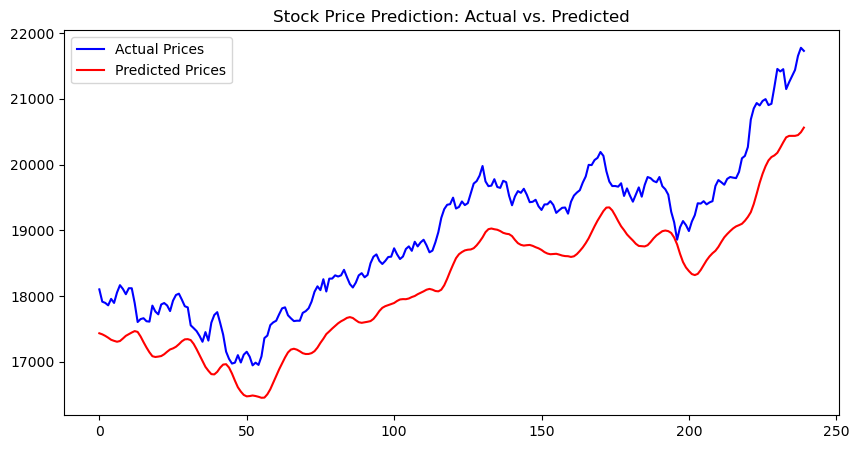

In [42]:
predictions = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))  # Convert back to original scale
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Convert actual y_test

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.legend()
plt.title("Stock Price Prediction: Actual vs. Predicted")
plt.show()


In [96]:
import pandas as pd

# Load the data from the CSV file
file_path = 'eros_indicators.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())

         Date        Close         High          Low         Open    Volume  \
0  2014-01-02  6221.149902  6358.299805  6211.299805  6301.250000  158100.0   
1  2014-01-03  6211.149902  6221.700195  6171.250000  6194.549805  139000.0   
2  2014-01-06  6191.450195  6224.700195  6170.250000  6220.850098  118300.0   
3  2014-01-07  6162.250000  6221.500000  6144.750000  6203.899902  138600.0   
4  2014-01-08  6174.600098  6192.100098  6160.350098  6178.049805  146900.0   

         RSI         %K         %D    Upper Band    Lower Band         ATR  \
0  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
1  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
2  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
3  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   
4  56.057072  61.212029  61.188646  12283.947469  11496.117508  146.587751   

        OBV       Chaikin           SMA          EMA  MA

In [98]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

# Calculate Stochastic Oscillator
def calculate_stochastic(df, k_window=14, d_window=3):
    df['%K'] = (df['Close'] - df['Low'].rolling(window=k_window).min()) / (df['High'].rolling(window=k_window).max() - df['Low'].rolling(window=k_window).min()) * 100
    df['%D'] = df['%K'].rolling(window=d_window).mean()

# Apply the functions to your DataFrame
calculate_rsi(data)
calculate_stochastic(data)

# Handle NaN values by backward fill
data.fillna(method='bfill', inplace=True)

# Inspect the updated DataFrame
print(data[['Close', 'RSI', '%K', '%D']].head())

         Close        RSI         %K         %D
0  6221.149902  61.487913  79.652465  89.938839
1  6211.149902  61.487913  79.652465  89.938839
2  6191.450195  61.487913  79.652465  89.938839
3  6162.250000  61.487913  79.652465  89.938839
4  6174.600098  61.487913  79.652465  89.938839


C:\Users\prana\AppData\Local\Temp\ipykernel_1860\2013815712.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [100]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features and target variable
features = data[['Close', 'RSI', '%K', '%D']].values
target_column = 'Close'
y = data[target_column].values  # Target variable

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable separately
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y for scaling

# Prepare the dataset for GRU (e.g., looking back 60 days)
X, y = [], []
days_back = 60
for i in range(days_back, len(X_scaled)):
    X.append(X_scaled[i-days_back:i])  # Use the last 60 days of data
    y.append(y_scaled[i])  # Target variable

X, y = np.array(X), np.array(y)

# Split into training, validation, and testing sets
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))  # 10% for validation
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1914, 60, 4)
X_val shape: (239, 60, 4)
X_test shape: (240, 60, 4)
y_train shape: (1914,)
y_val shape: (239,)
y_test shape: (240,)


In [102]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization

def create_gru_model():
    model = Sequential()
    
    # Input Layer and First GRU Layer
    model.add(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Second GRU Layer
    model.add(GRU(64, return_sequences=True))  # Stacked GRU layer
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Third GRU Layer
    model.add(GRU(32))  # Last GRU layer
    model.add(Dropout(0.1))  # Dropout for regularization
    model.add(BatchNormalization())  # Batch normalization for stability
    
    # Output Layer
    model.add(Dense(1))  # Predicting the next day's price
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Instantiate the GRU model
gru_model = create_gru_model()

# Print the model summary
gru_model.summary()

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_37 (GRU)                         │ (None, 60, 128)             │          51,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_38 (GRU)                         │ (None, 60, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_39 (GRU)                         │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,041 (386.88 KB)

 Trainable params: 98,593 (385.13 KB)

 Non-trainable params: 448 (1.75 KB)

In [110]:
# Train the model
history = gru_model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=32, 
                        validation_data=(X_val, y_val),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)])  # Early stopping to prevent overfitting

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0043 - val_loss: 0.0019
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0041 - val_loss: 8.9059e-04
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/

In [111]:
# Evaluate the model on the test set
loss = gru_model.evaluate(X_test, y_test)
print("GRU model loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0092
GRU model loss: 0.016664735972881317


In [112]:
# Make predictions
predicted_prices = gru_model.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices_inverse = scaler_y.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

  

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


In [113]:
# Calculate performance metrics
mse = mean_squared_error(y_test_inverse, predicted_prices_inverse)
mae = mean_absolute_error(y_test_inverse, predicted_prices_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predicted_prices_inverse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4148501.474729204
Mean Absolute Error (MAE): 1815.626863606771
Root Mean Squared Error (RMSE): 2036.7870469759976
R-squared (R2): -2.358515287919314


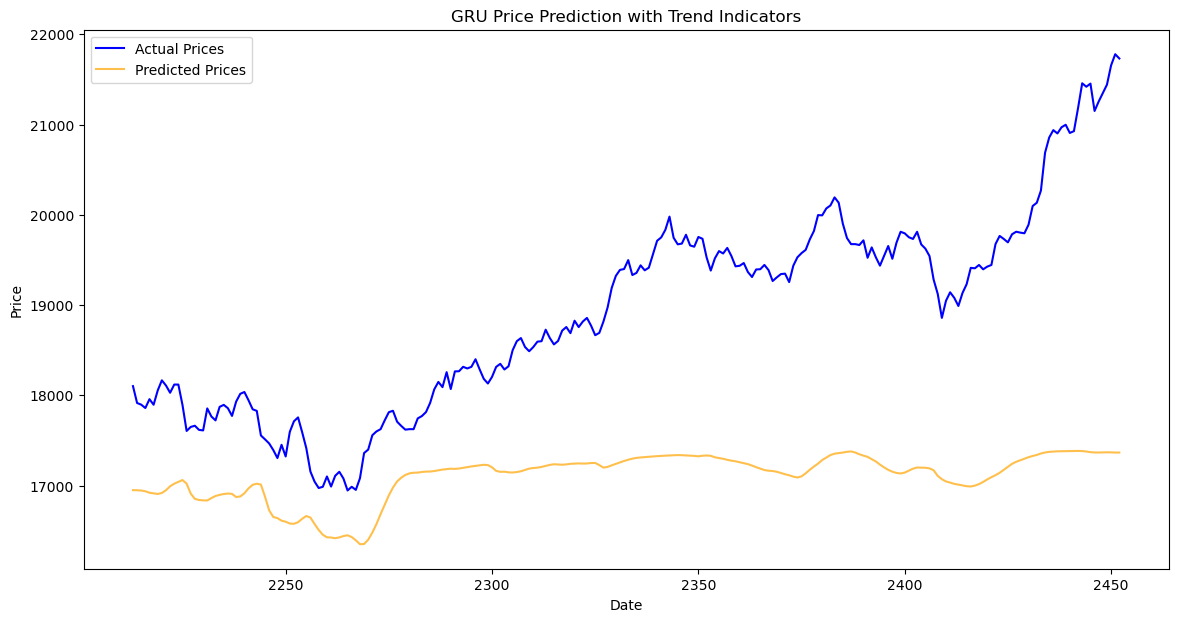

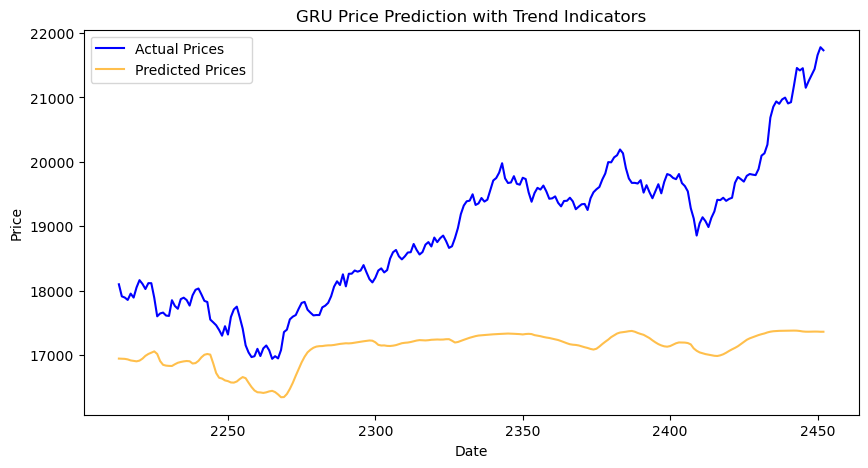

In [114]:
# Visualizing results
plt.figure(figsize=(14, 7))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('GRU Price Prediction with Trend Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(data.index[len(data) - len(y_test):], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[len(data) - len(predicted_prices_inverse):], predicted_prices_inverse, label='Predicted Prices', color='orange', alpha=0.7)
plt.title('GRU Price Prediction with Trend Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()